In [9]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext,SparkSession
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from datetime import datetime
import folium.plugins
import json
import matplotlib.pyplot as plt
import ipywidgets as widgets
from operator import itemgetter
import ipywidgets as widgets
import numpy as np
from pyspark.rdd import RDD


# Dataset


In [3]:
nmbs = json.load(open("Datasets/nmbs-stations.json"))
print(json.dumps(nmbs, indent=4, sort_keys=True))

[
    {
        "departures": "https://data.irail.be/NMBS/Liveboard/Chastre/2018/01/07/23/56",
        "geo": {
            "lat": 50.607464,
            "lon": 4.649833
        },
        "id": "BE.NMBS.008861523",
        "latitude": "50.607464",
        "longitude": "4.649833",
        "name": "Chastre"
    },
    {
        "departures": "https://data.irail.be/NMBS/Liveboard/Dinant/2018/01/07/23/56",
        "geo": {
            "lat": 50.260724,
            "lon": 4.908179
        },
        "id": "BE.NMBS.008863503",
        "latitude": "50.260724",
        "longitude": "4.908179",
        "name": "Dinant"
    },
    {
        "departures": "https://data.irail.be/NMBS/Liveboard/Cour Sur Heure/2018/01/07/23/56",
        "geo": {
            "lat": 50.300889,
            "lon": 4.392258
        },
        "id": "BE.NMBS.008873379",
        "latitude": "50.300889",
        "longitude": "4.392258",
        "name": "Cour Sur Heure"
    },
    {
        "departures": "https://data.irail

# Geografische voorstelling van alle stations

In [4]:

nmbs = json.load(open("Datasets/nmbs-stations.json"))
#print(nmbs)
m = folium.Map(location=[50.503887, 4.469936],zoom_start=8 )
cluster = folium.plugins.MarkerCluster().add_to(m)
tooltip = "Klik voor stationnaam"

for x in nmbs:
    folium.Marker(location = [x["geo"]['lat'],x["geo"]['lon']], popup='<i>'+ x["name"] +'</i>', tooltip=tooltip).add_to(cluster)

folium.LayerControl(collapsed=True).add_to(m)
m



# Geografische voorstelling van alle hoofdsporen

In [12]:
locations = json.load(open("Datasets/geosporen.json"))
sporen = folium.Map(location=[50.503887, 4.469936],zoom_start=8, tiles='cartodbdark_matter')
len_locations = len(locations)

#Onderste lijn weghalen uit commentaar voor volledige weergave 
#for i in range(len_locations):
for i in range(2):
    len_coordinates = len(locations[i]['fields']['geo_shape']['coordinates'][0])
    coordinates_array = []
    for x in range(len_coordinates):
        coordinates_array.append(tuple(locations[i]['fields']['geo_shape']['coordinates'][0][x])[::-1])

    folium.PolyLine(coordinates_array, color='white', weight=4).add_to(sporen)

sporen

# Zoeken voor de stiptheid van grote stations

Geef de naam van het station: Aalst


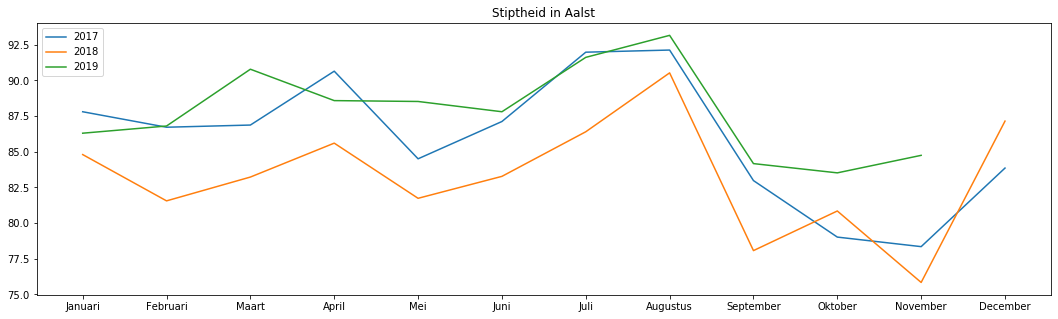

In [5]:
while True:
    try: 
        stiptheid = json.load(open("Datasets/stiptheid-in-grote-stations-per-maand.json"))
        len_stiptheid = len(stiptheid)
        data = []
        for i in (range(len_stiptheid)):
            data.append(stiptheid[i]['fields']['station'])


        stations = list(dict.fromkeys(data))
        stations.sort()

        station = input('Geef de naam van het station: ').upper()
        output_dict = [(x['fields']['reg'],x['fields']['maand']) for x in stiptheid if x['fields']['station'] == station]

        sort_dict = sorted(output_dict, key=itemgetter(1))
        maanden = ['Januari','Februari','Maart','April','Mei','Juni','Juli','Augustus','September','Oktober','November','December']
        values = []
        values2 = []
        values3 = []

        for x in range(12):
            values.append(sort_dict[x][0])
        for x in range(12,24):
            values2.append(sort_dict[x][0])
        for x in range(24,len(sort_dict)):
            values3.append(sort_dict[x][0])
        fig = plt.figure(figsize=(40, 5))
        plt1 = fig.add_subplot(121)
        plt1.plot(maanden, values)
        plt1.plot(values2)
        plt1.plot(values3)
        plt1.set_title('Stiptheid in ' + station.capitalize())
        plt1.legend(['2017', '2018', '2019'], loc='upper left')
        plt.show()
        break
    except:
        print('Je hebt het verkeerde station ingegeven')

# Lijst van stiptheid van grote stations

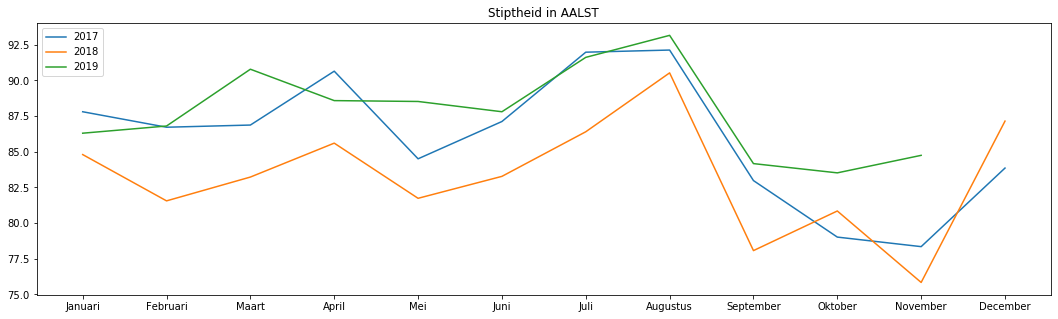

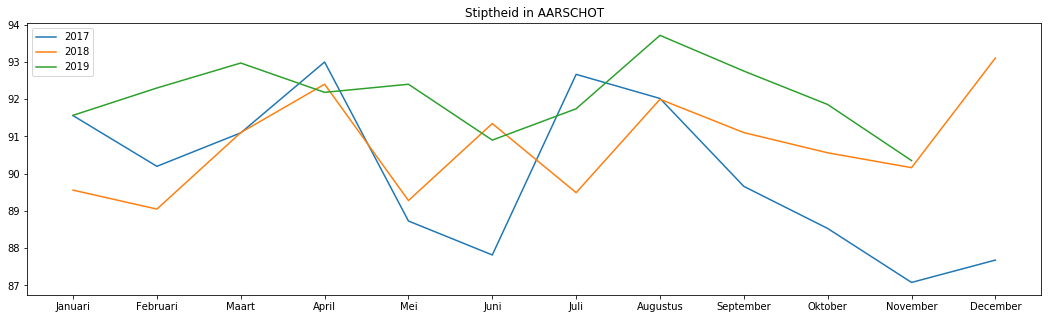

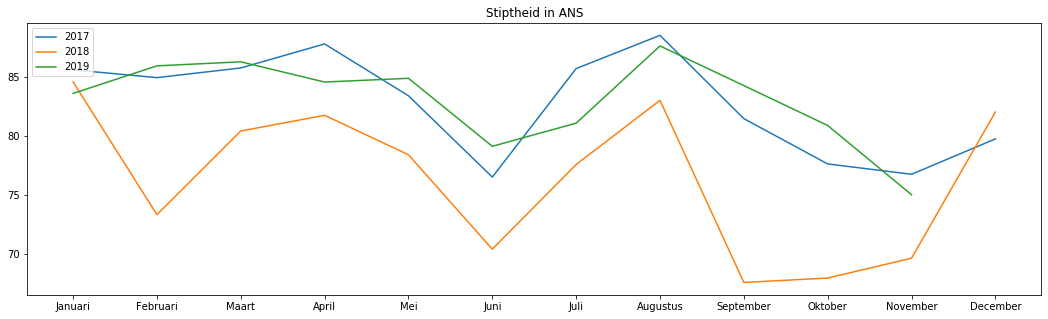

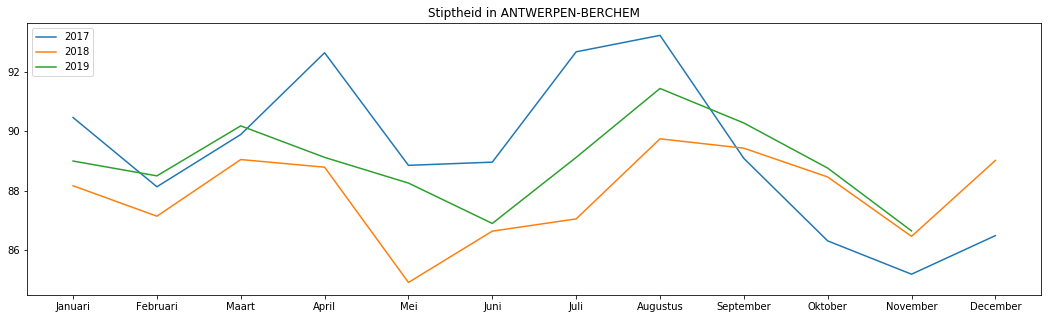

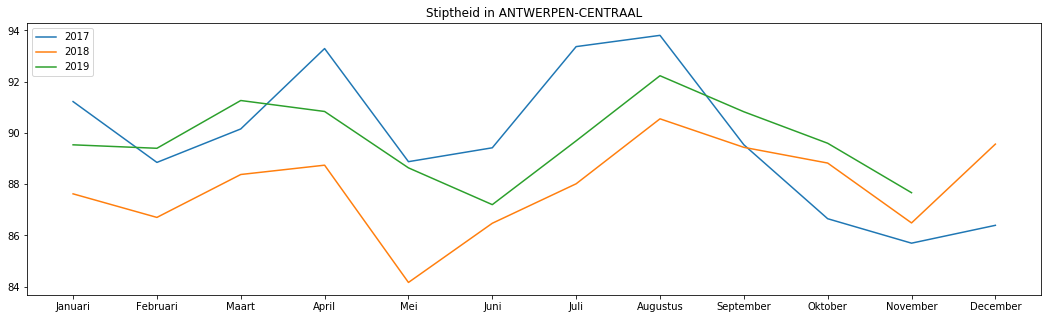

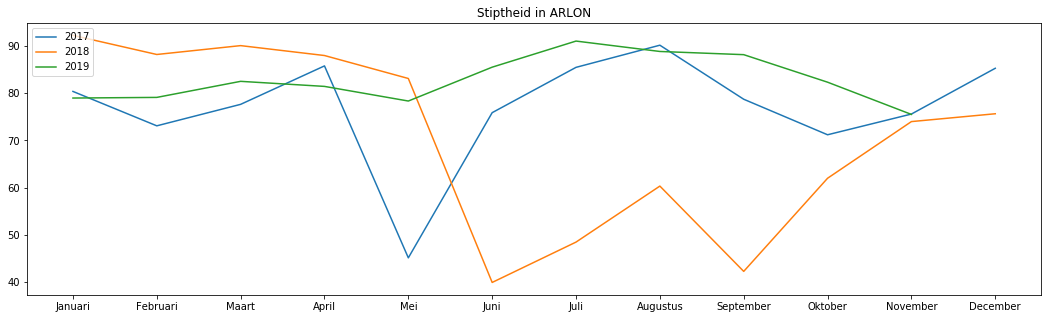

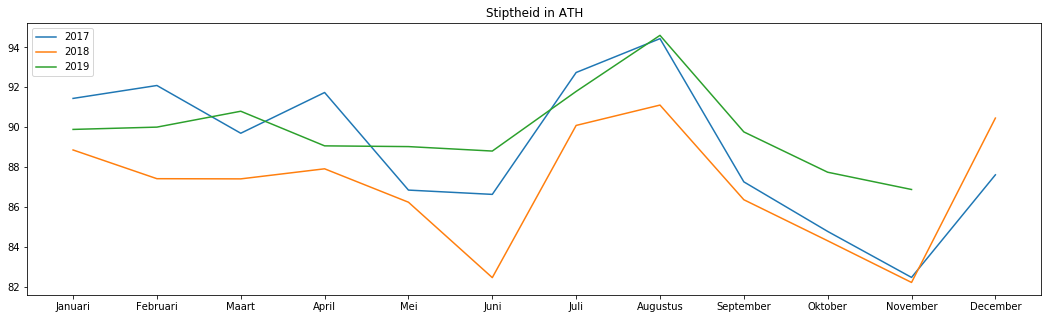

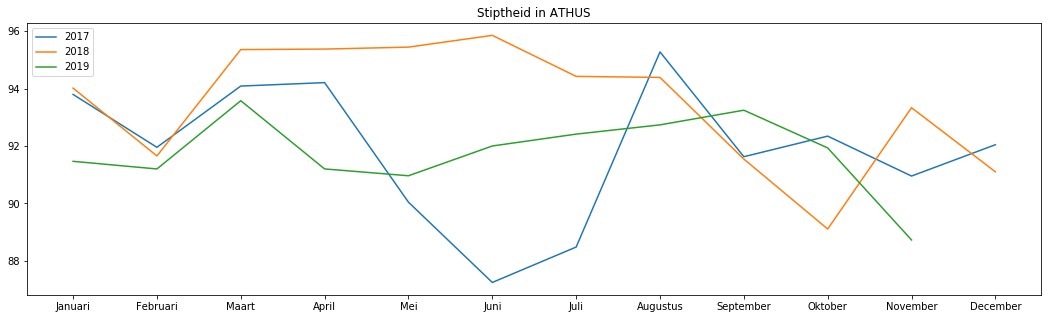

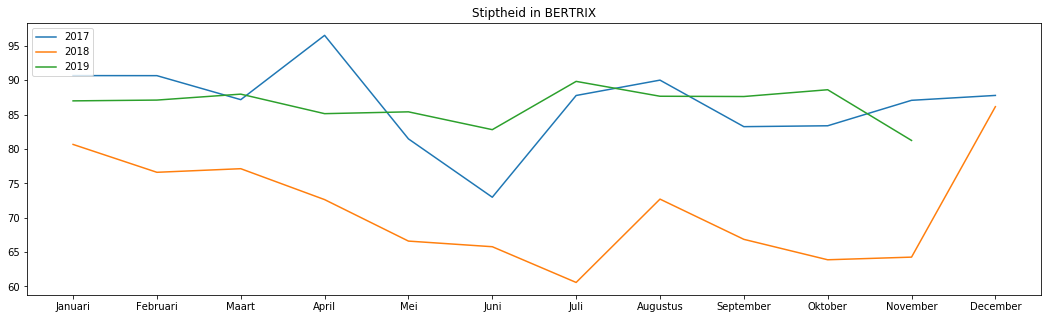

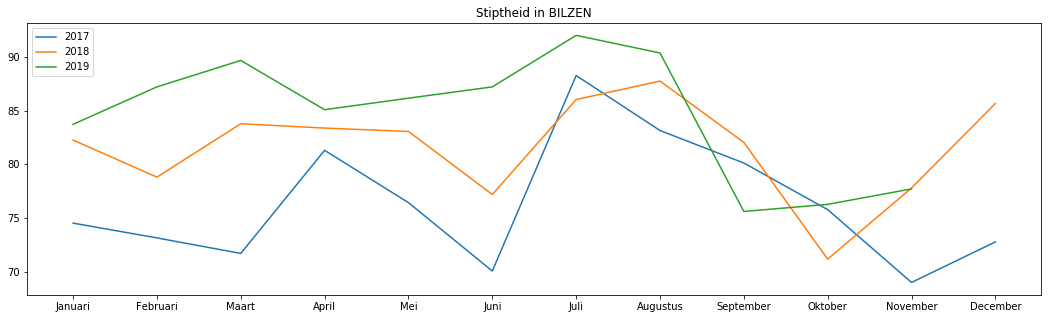

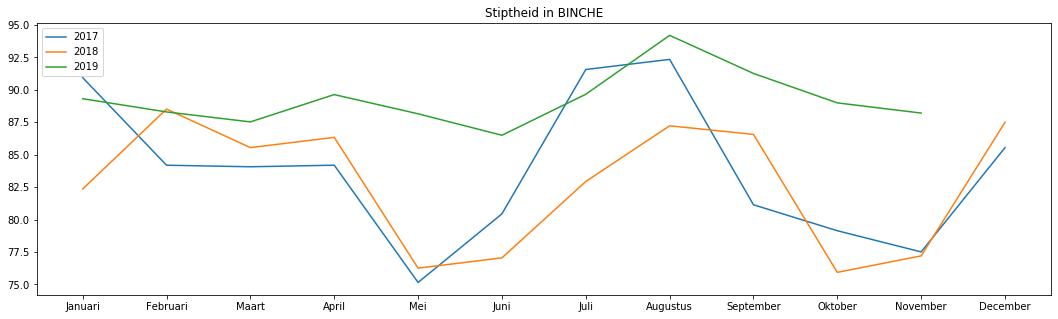

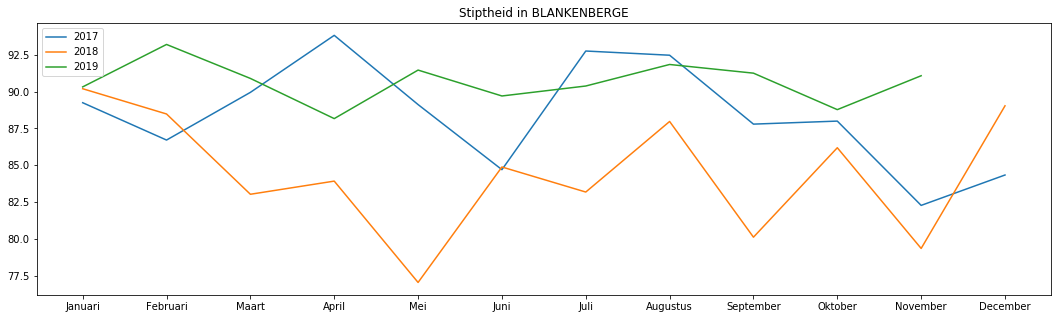

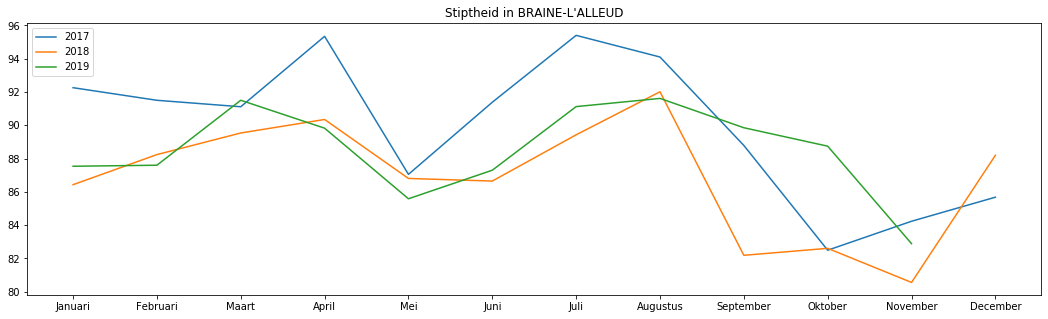

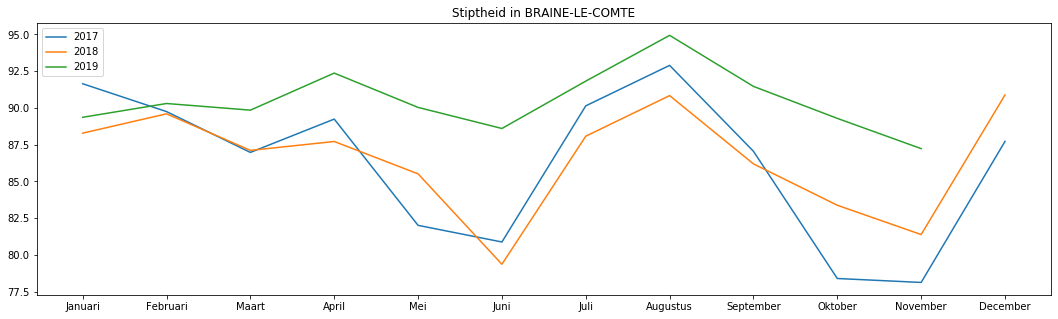

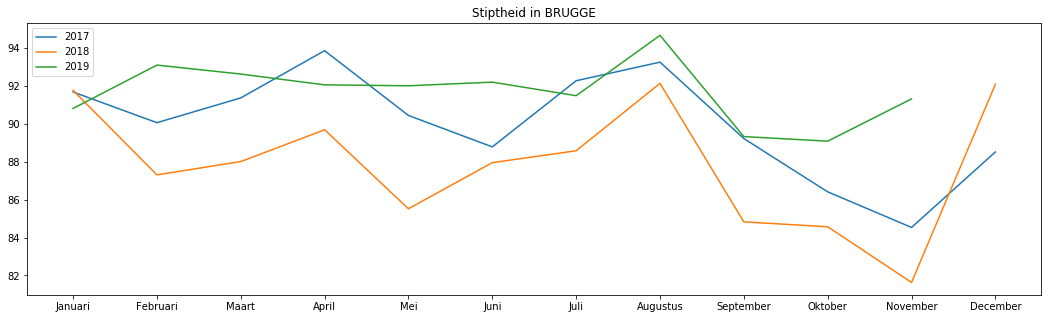

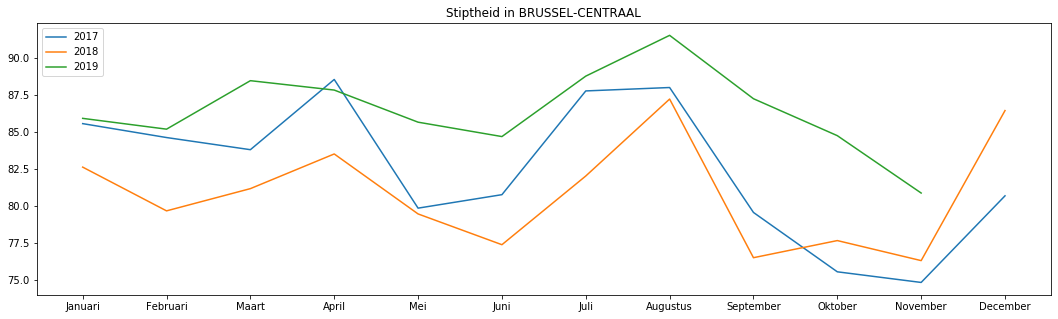

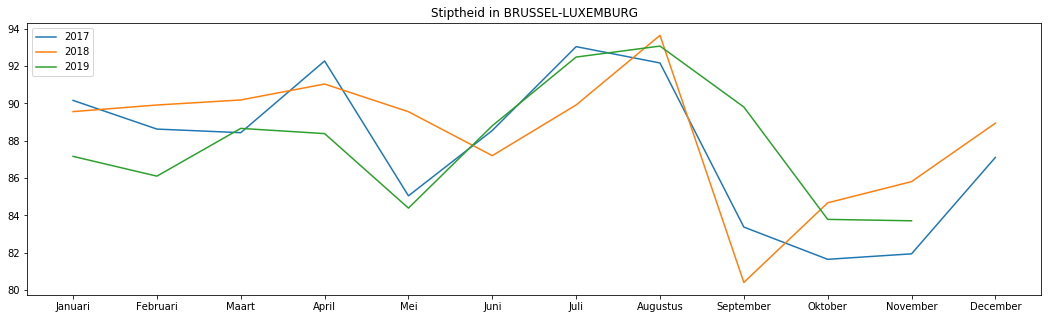

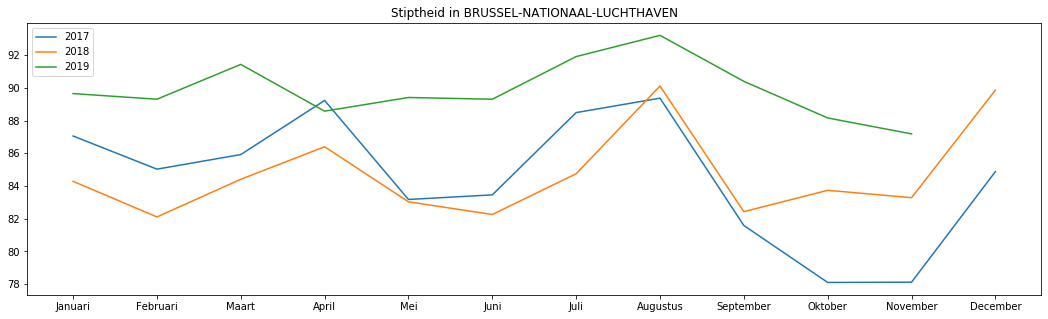

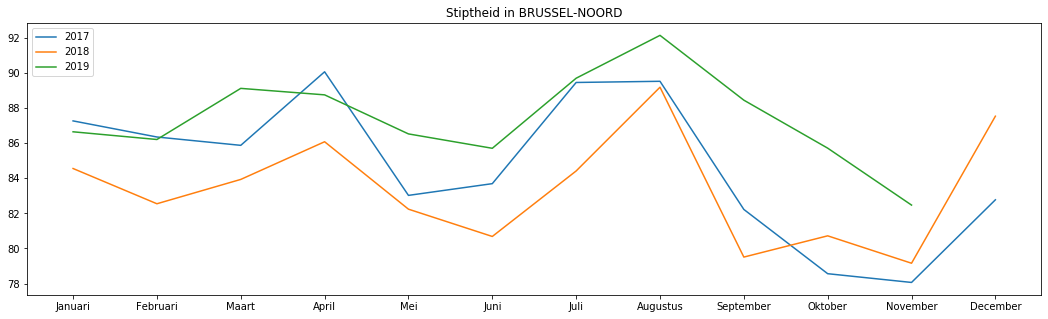

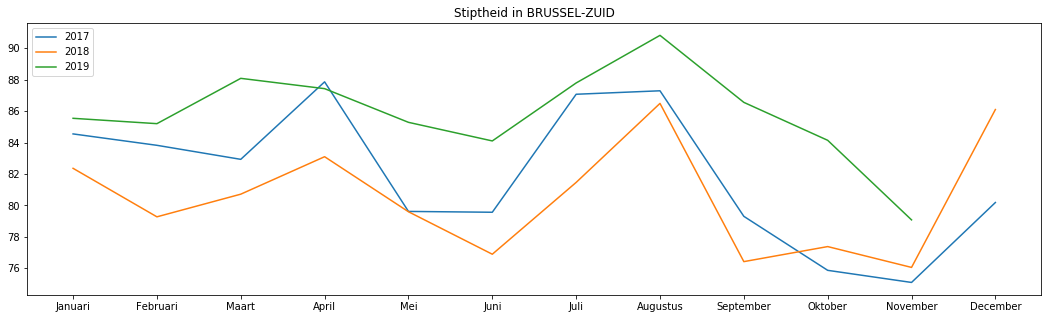

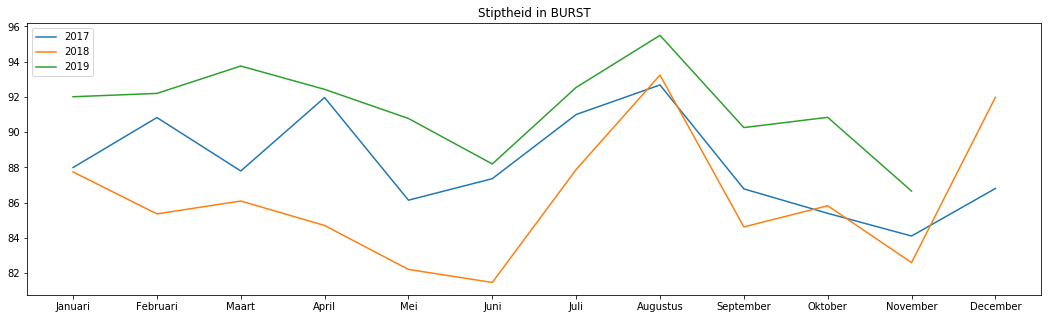

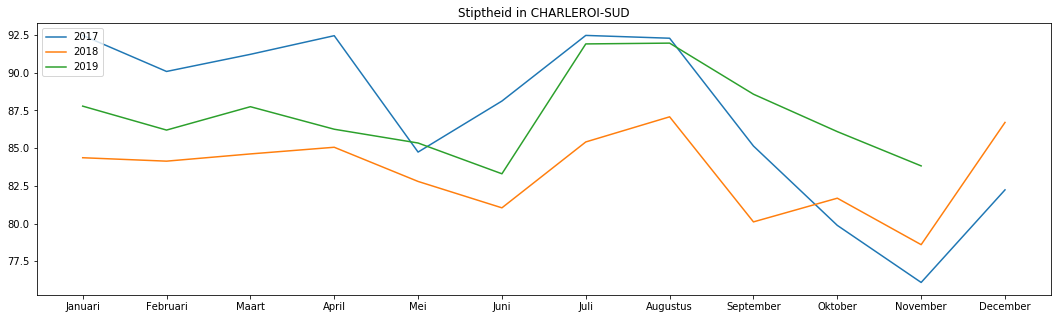

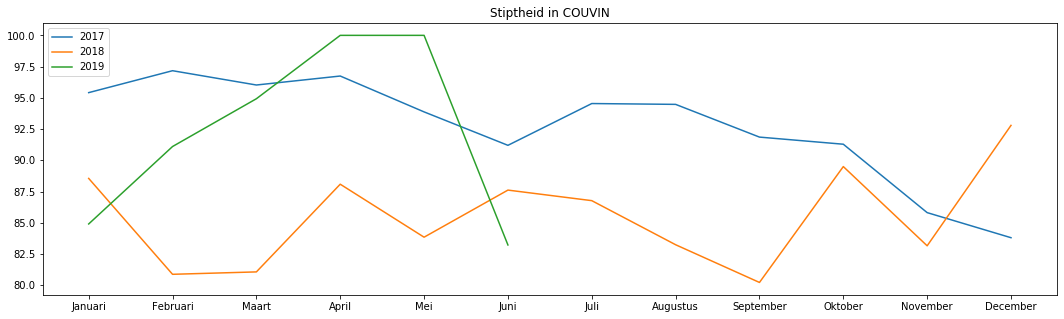

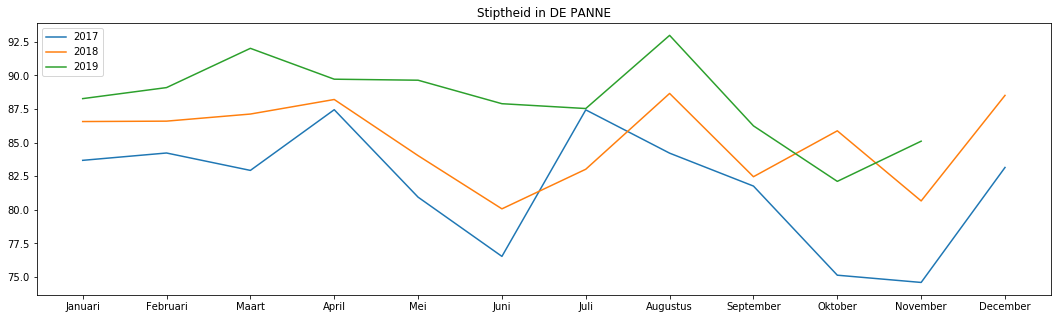

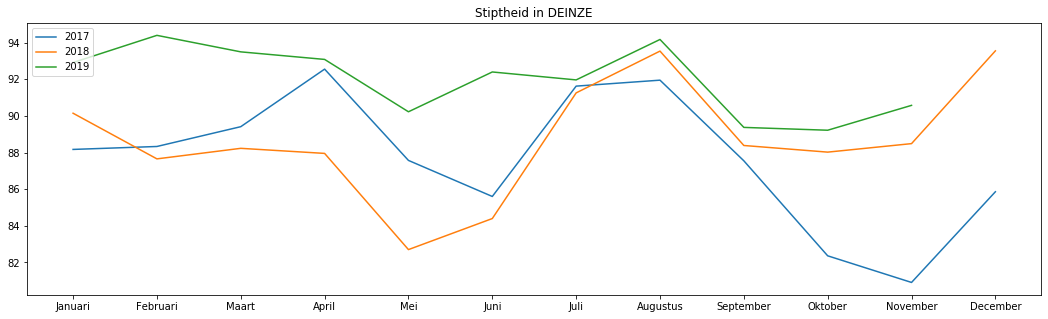

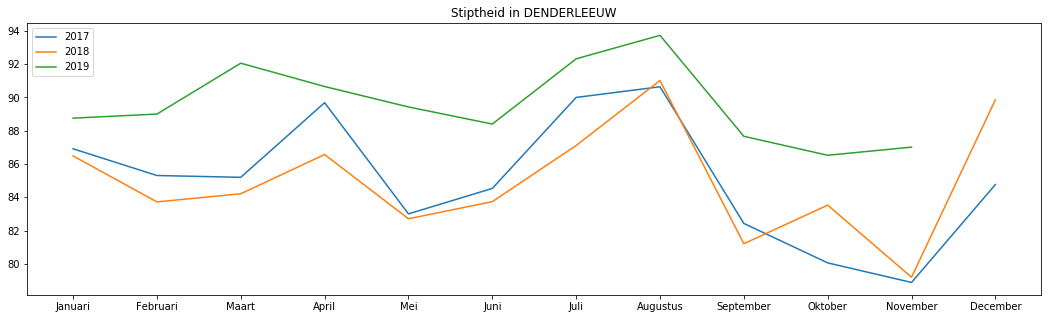

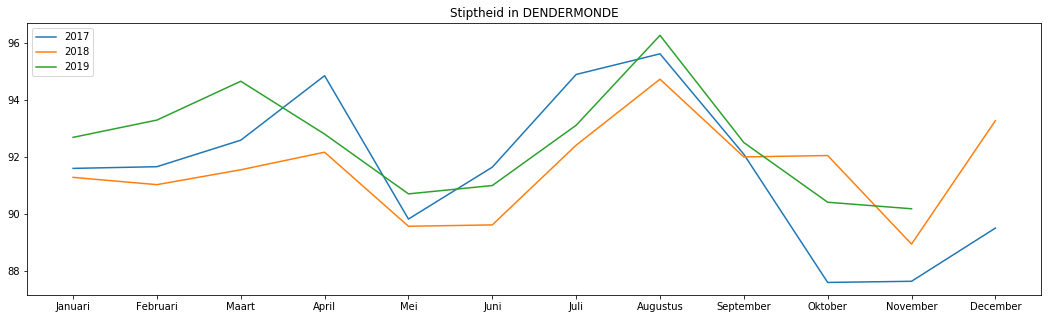

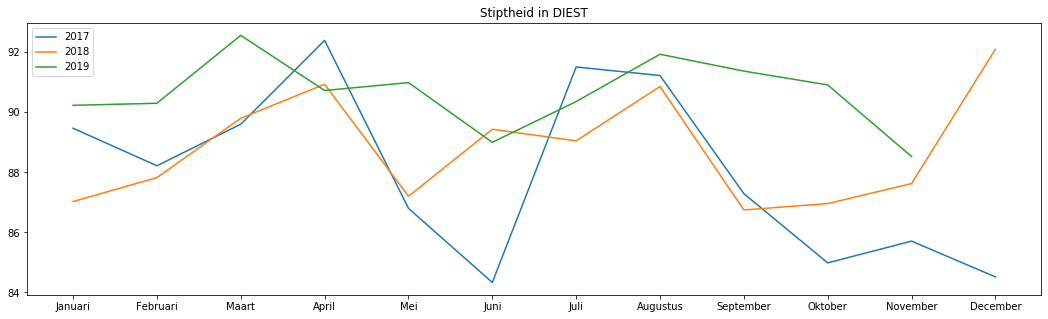

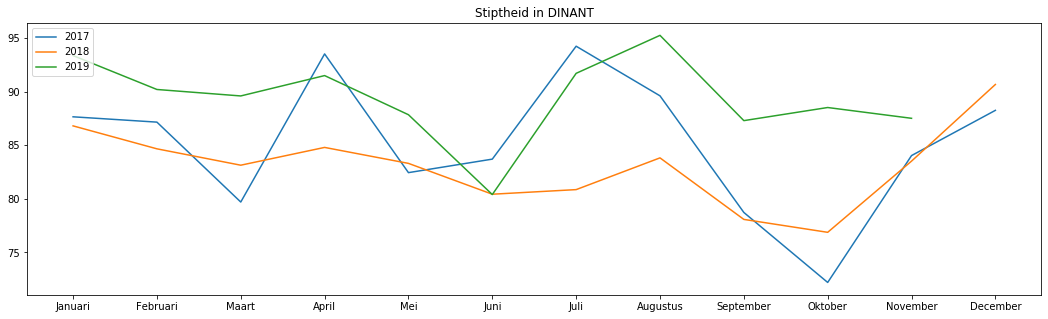

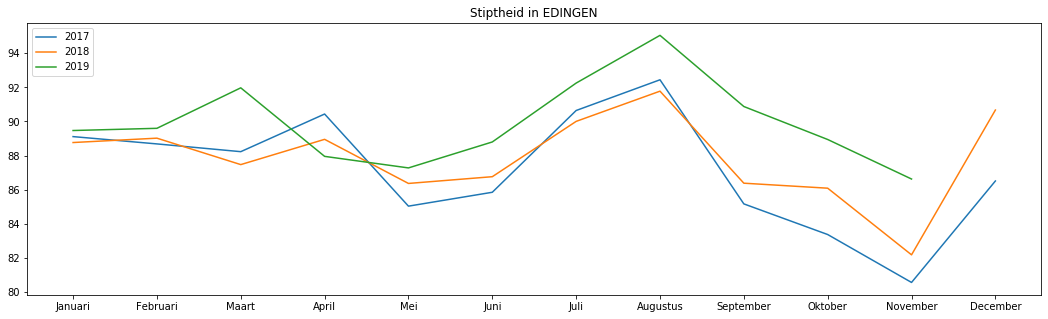

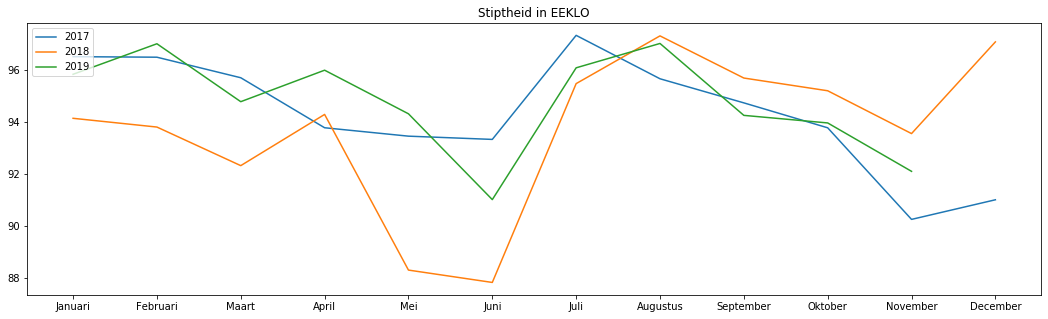

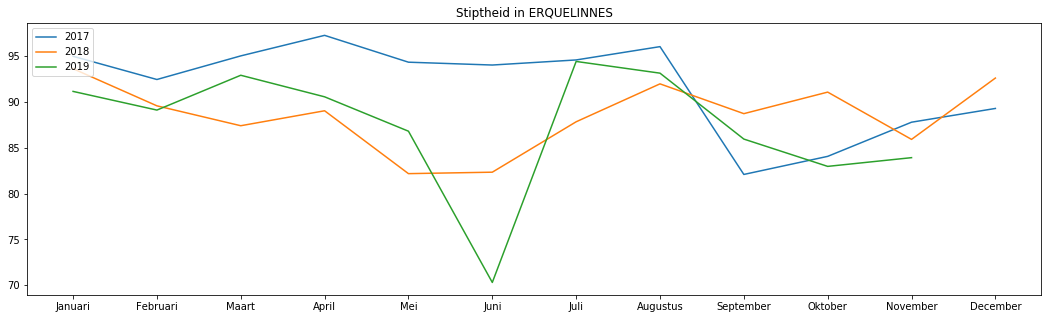

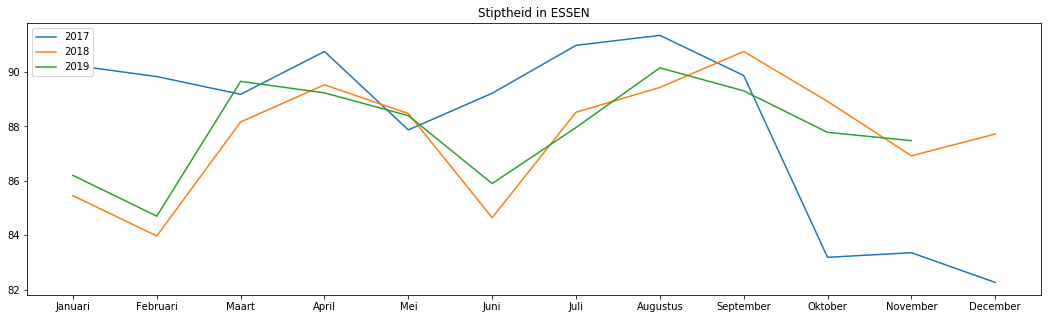

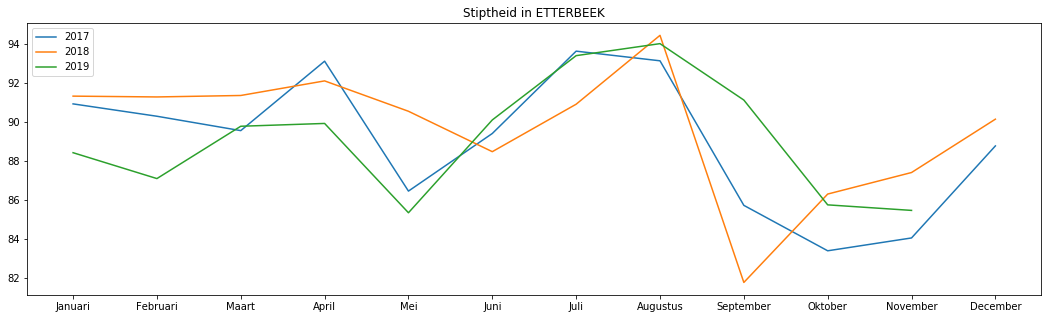

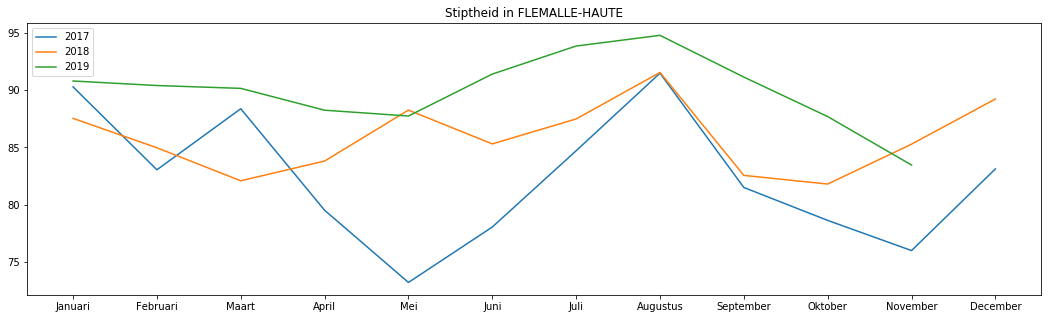

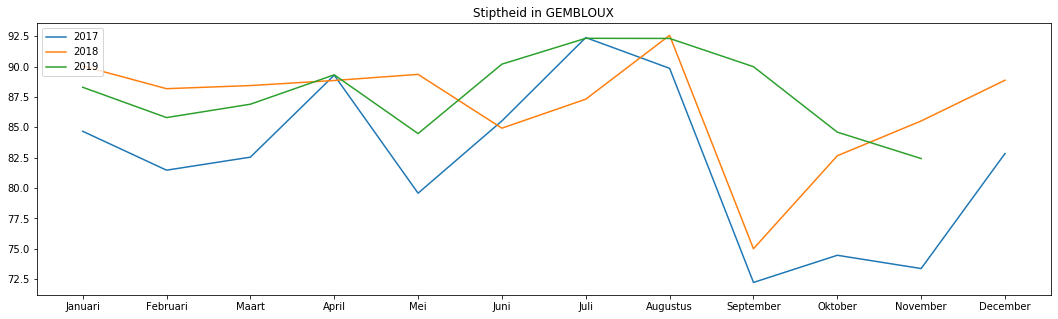

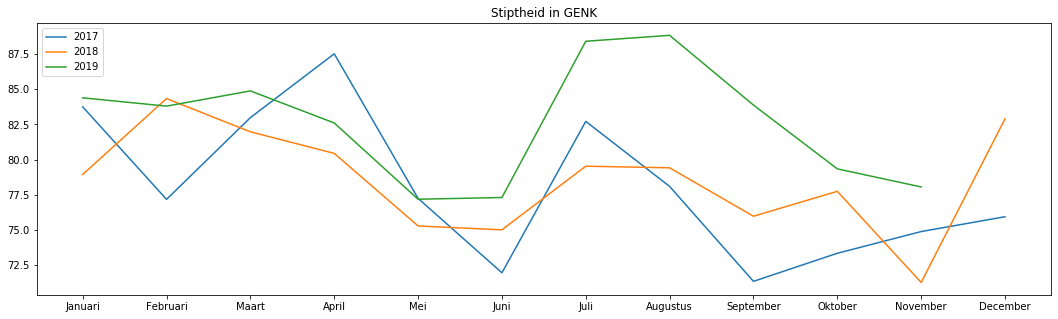

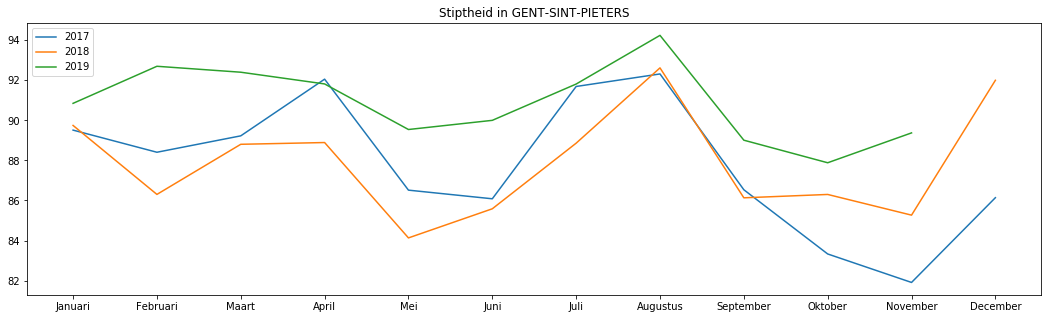

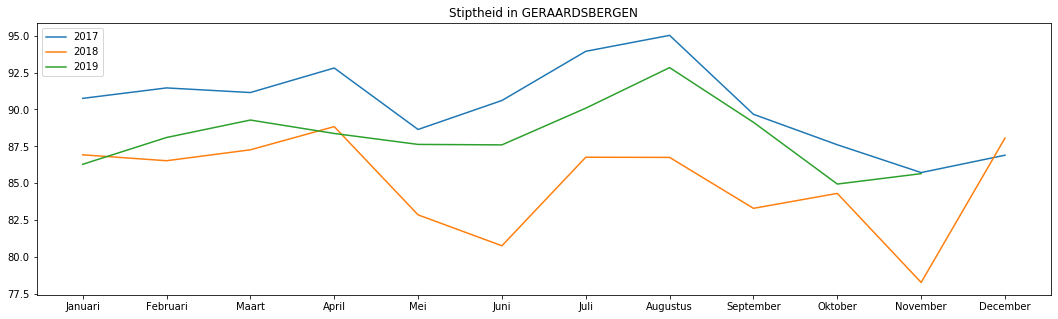

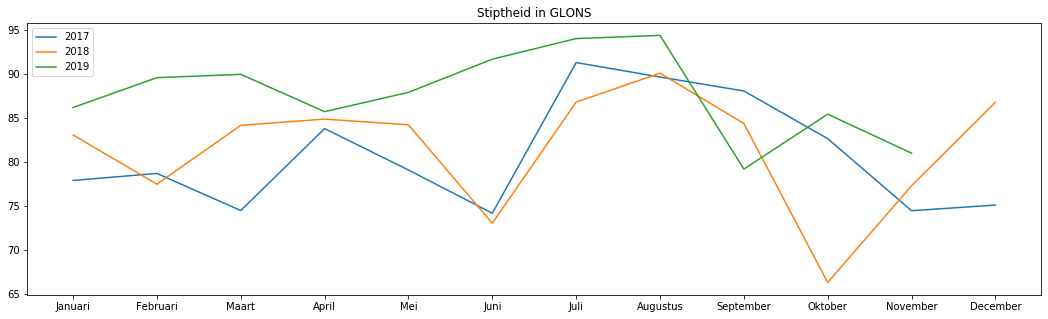

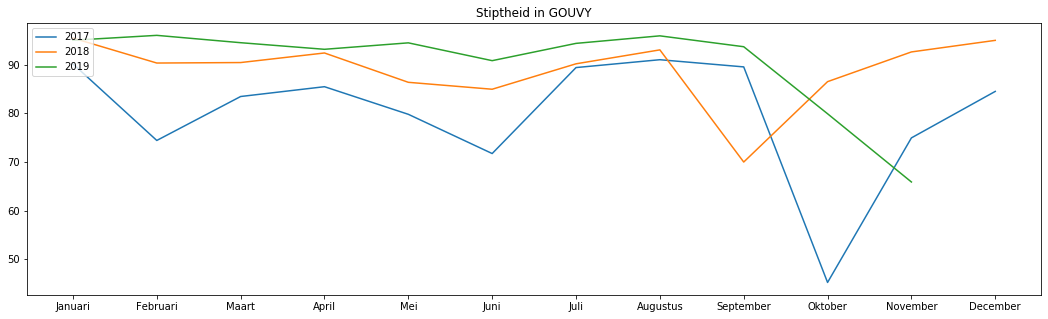

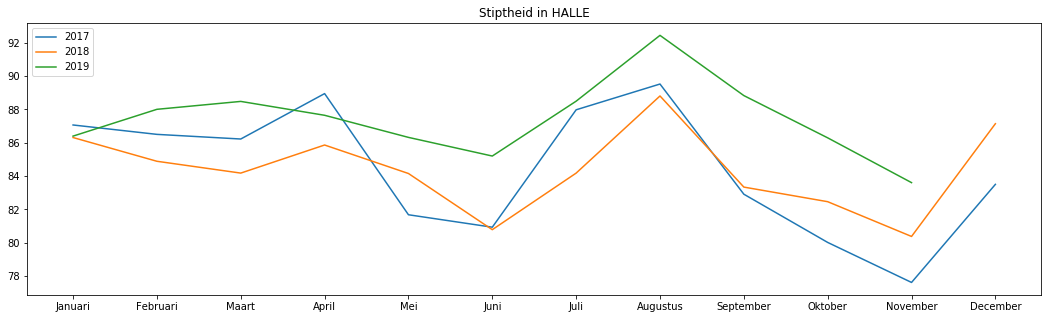

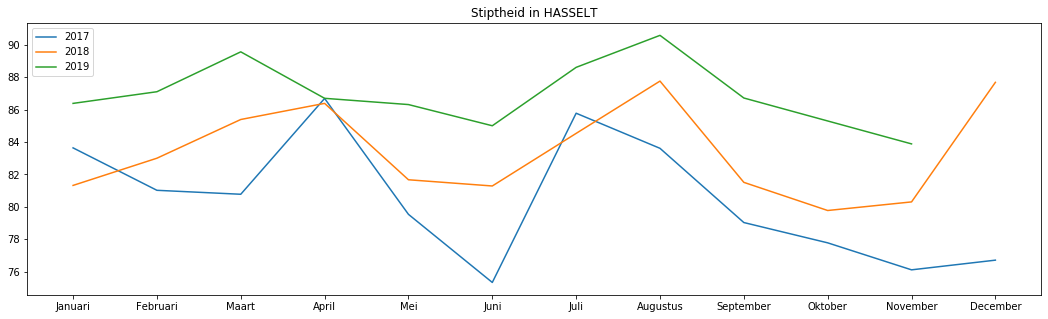

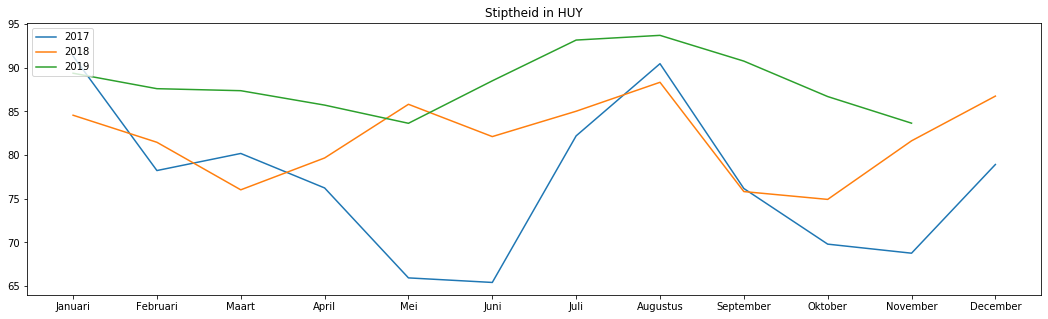

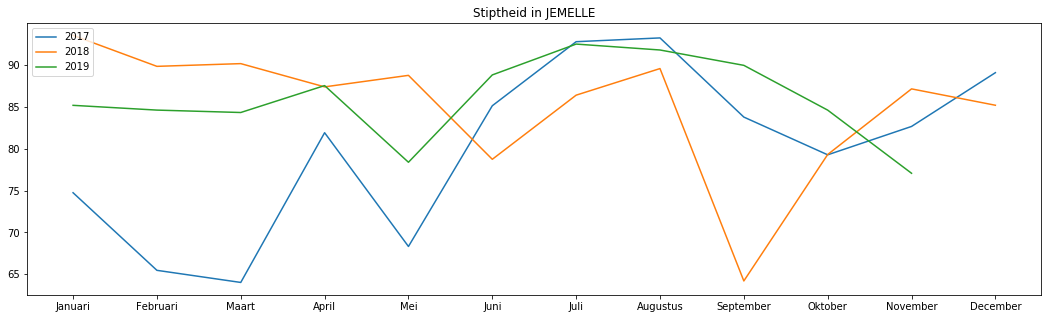

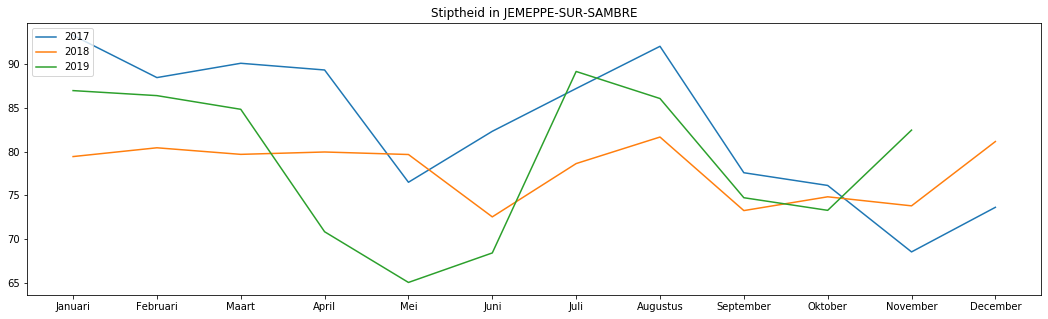

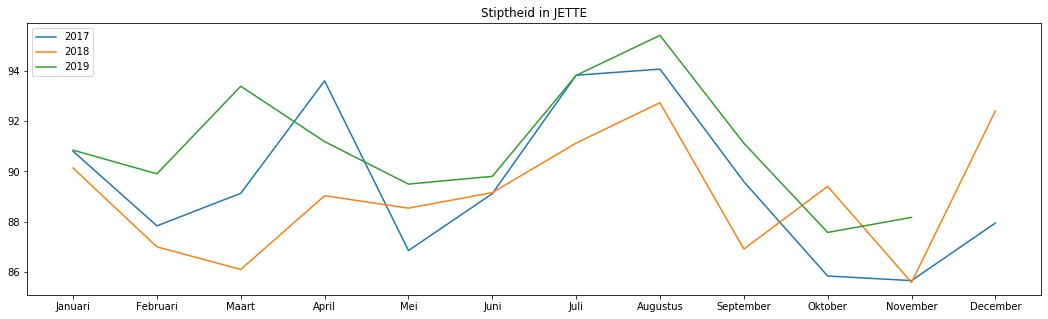

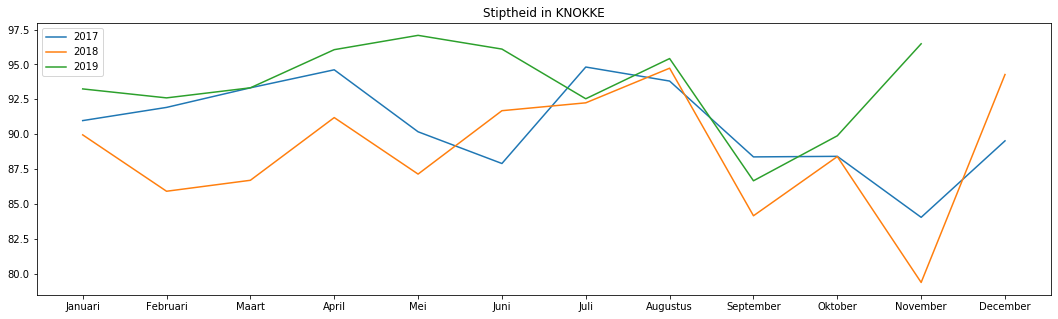

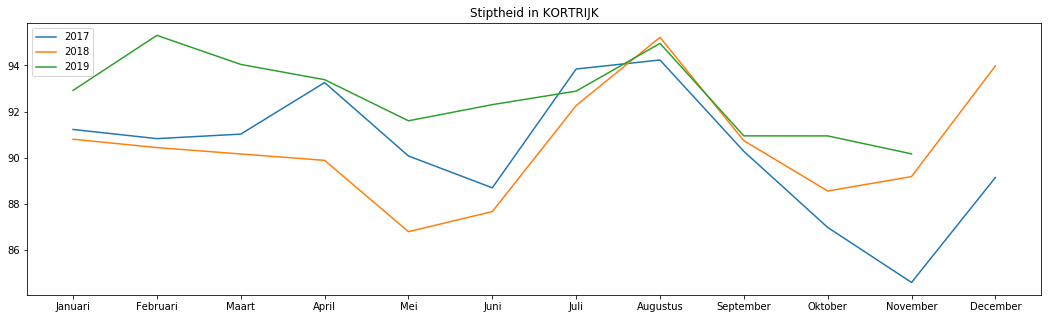

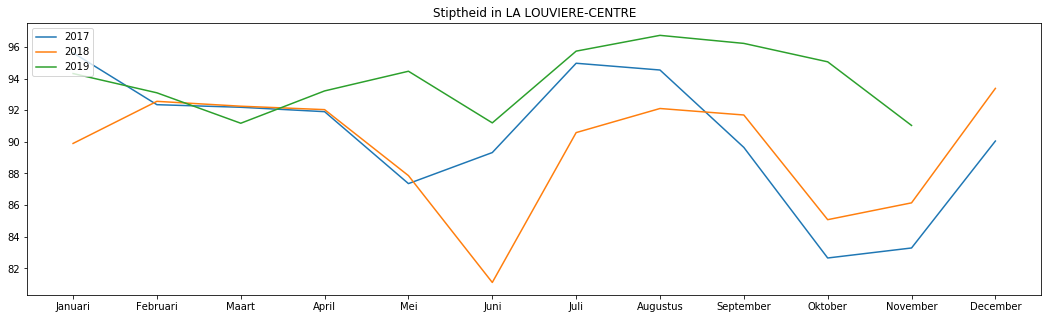

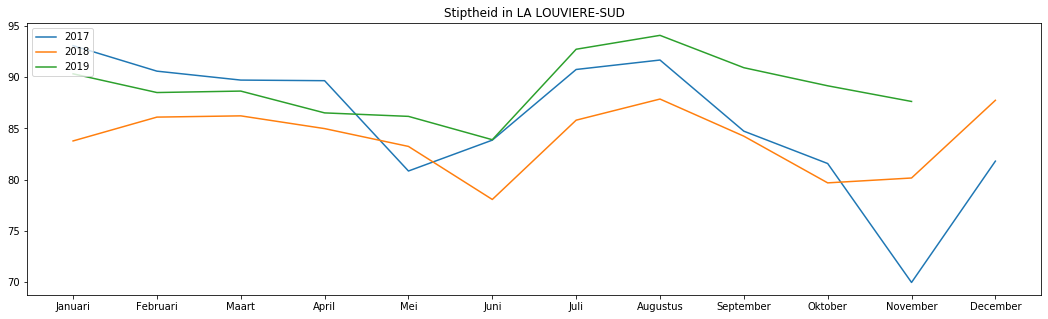

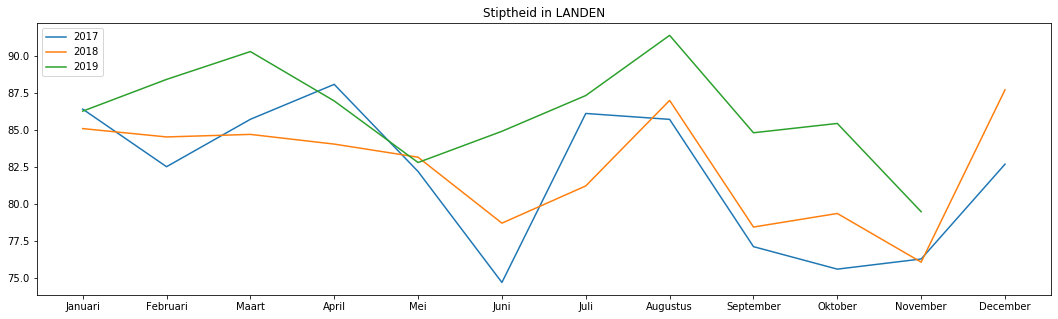

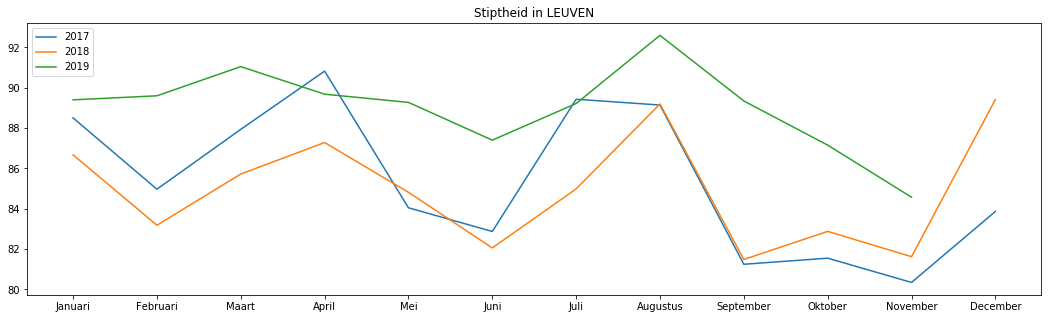

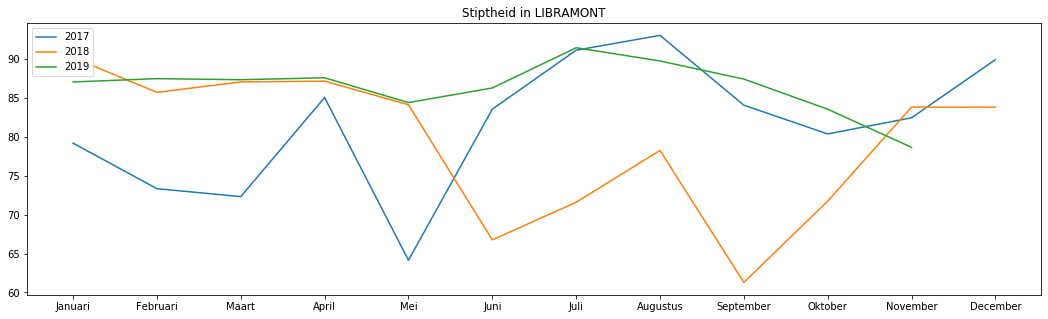

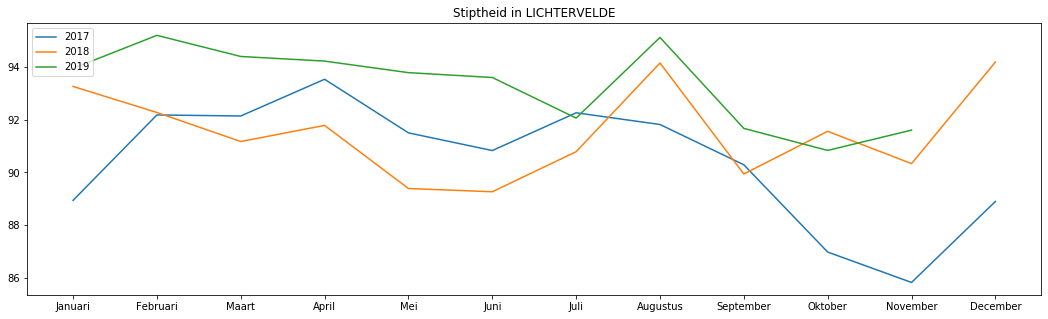

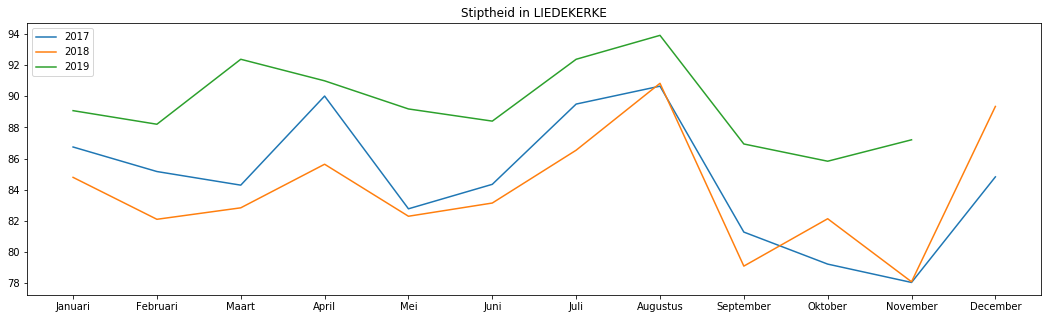

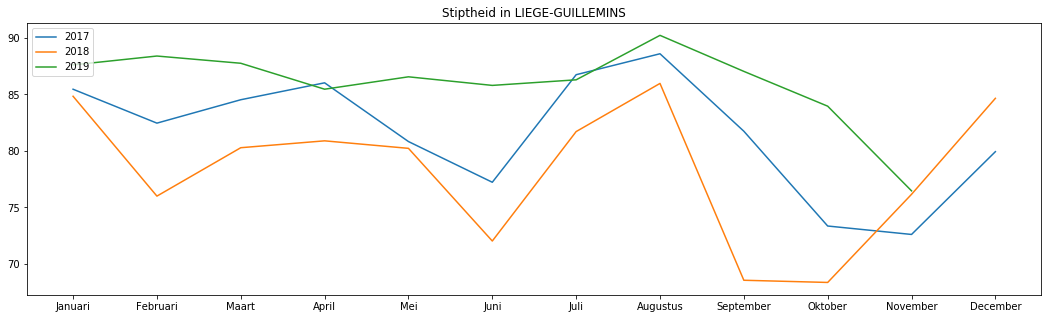

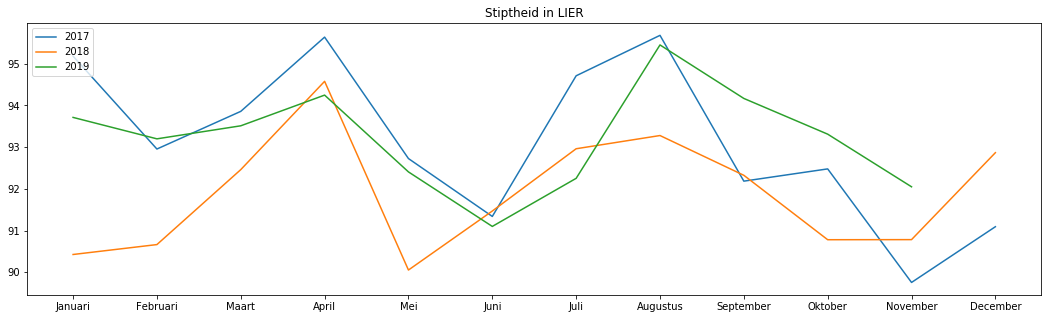

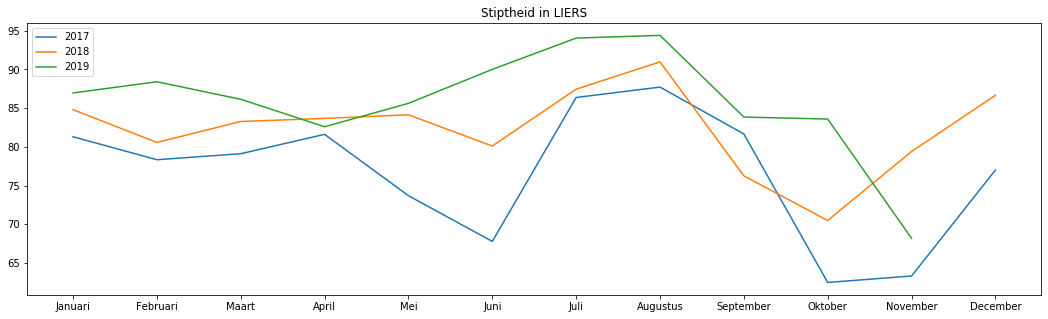

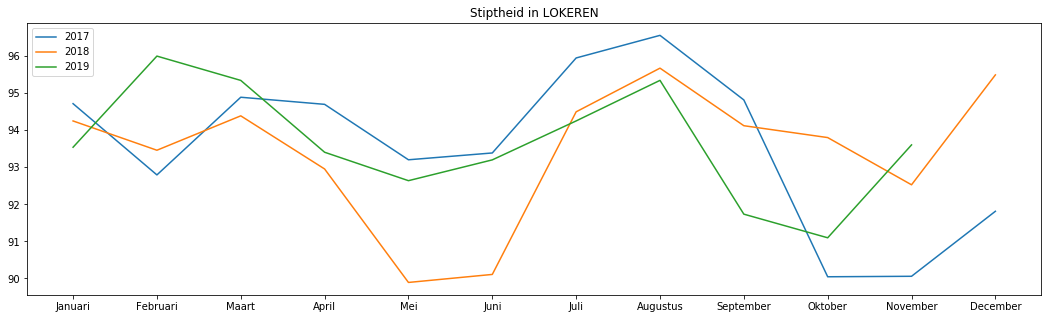

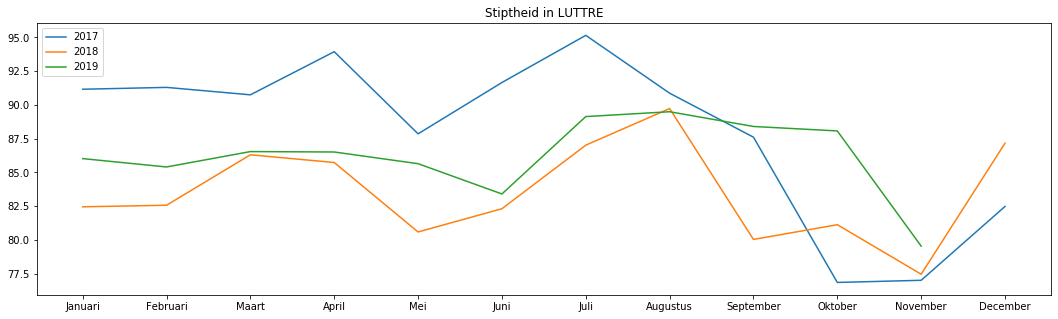

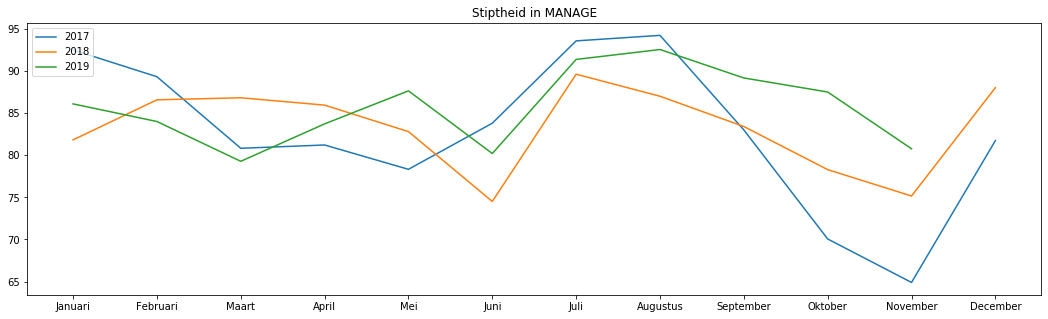

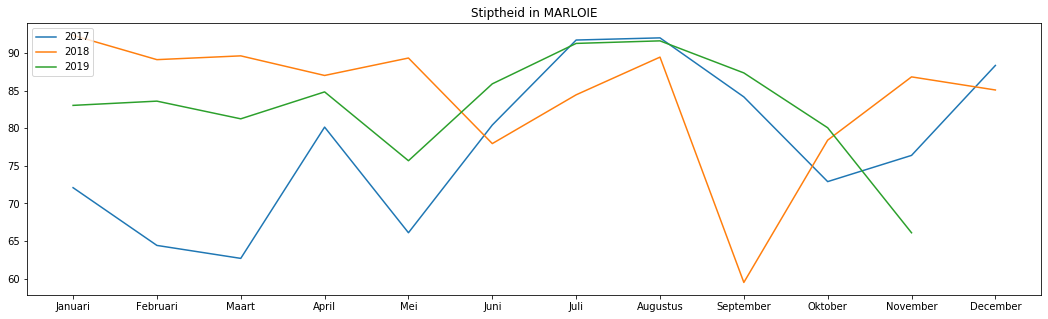

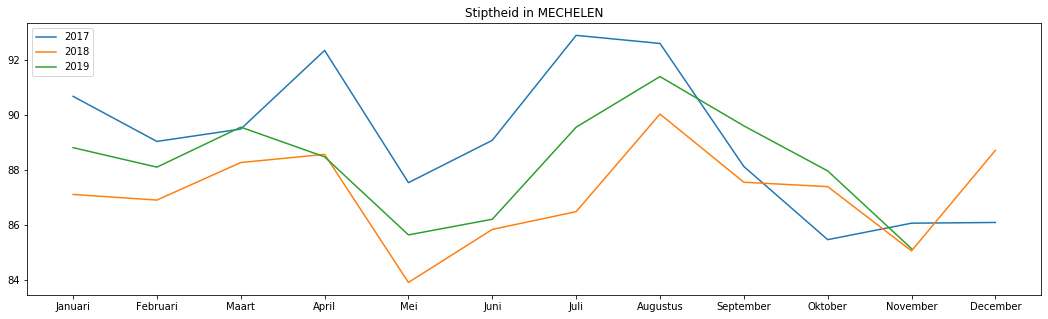

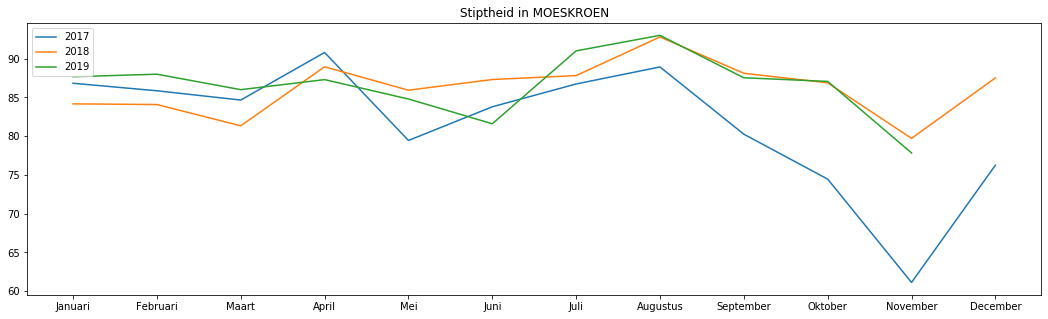

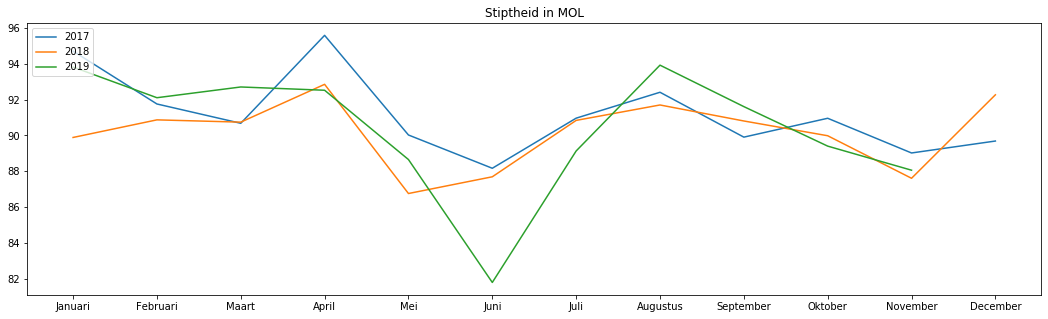

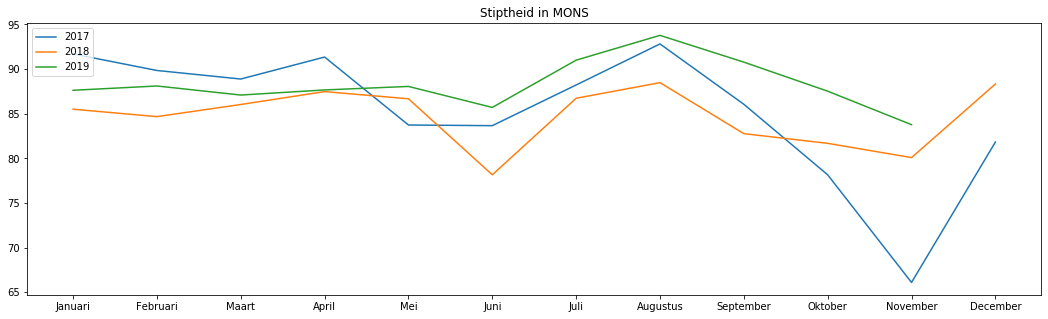

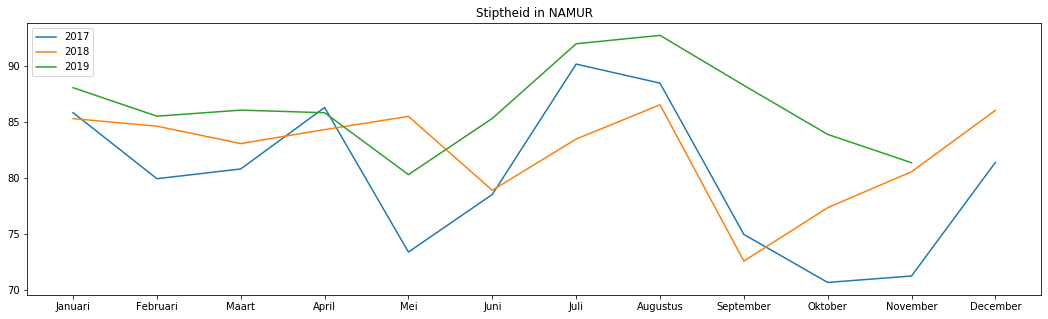

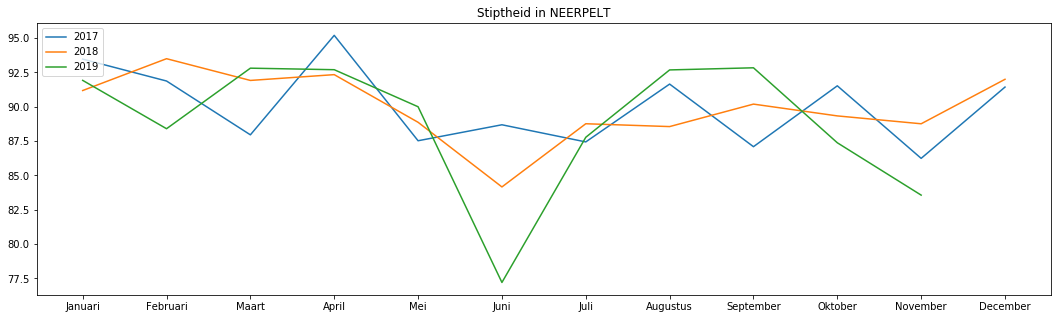

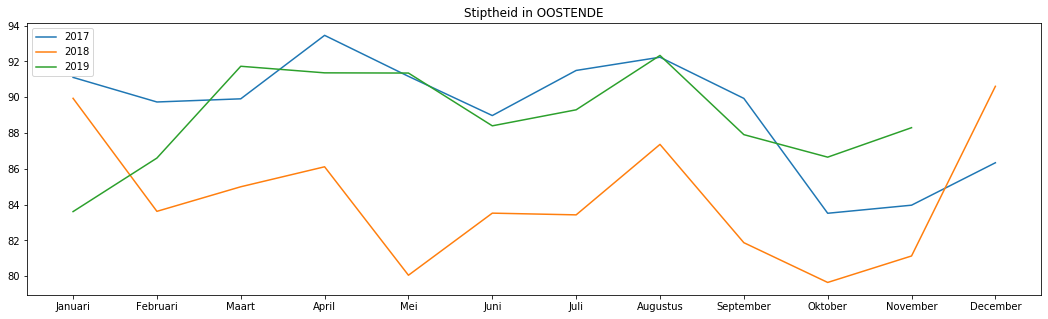

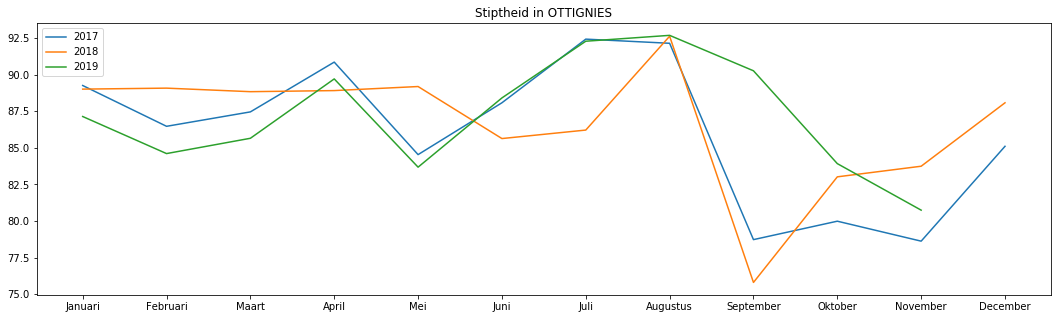

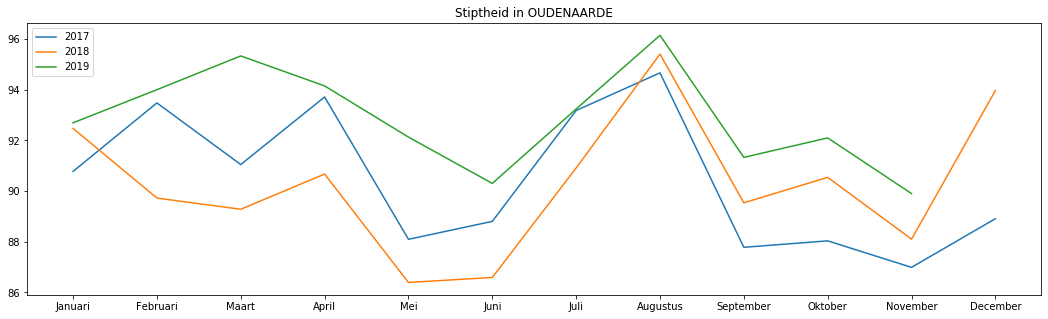

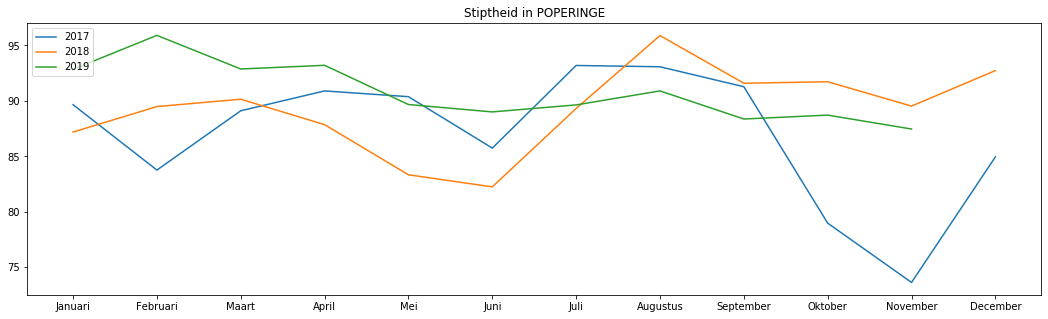

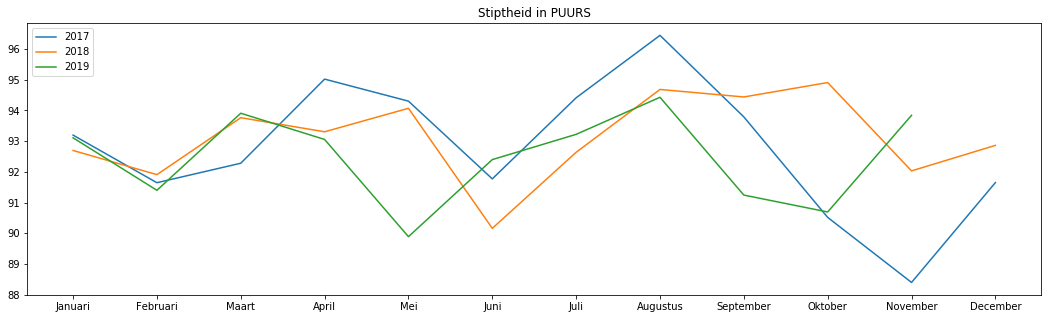

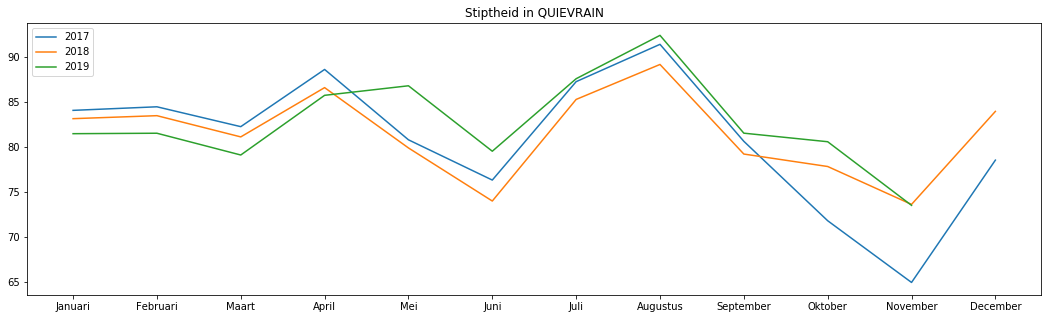

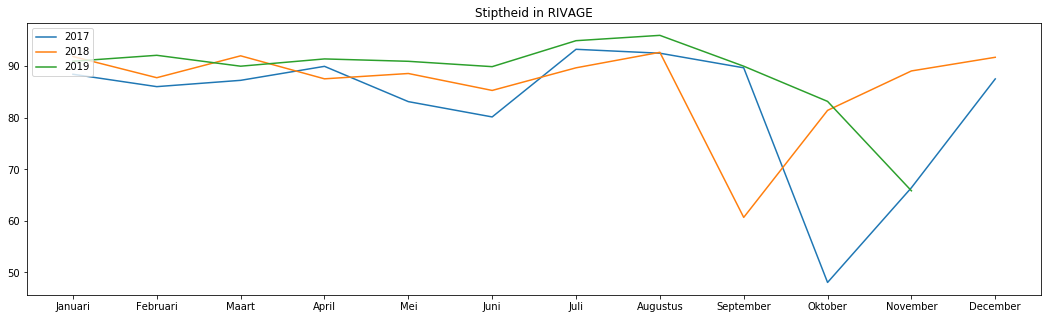

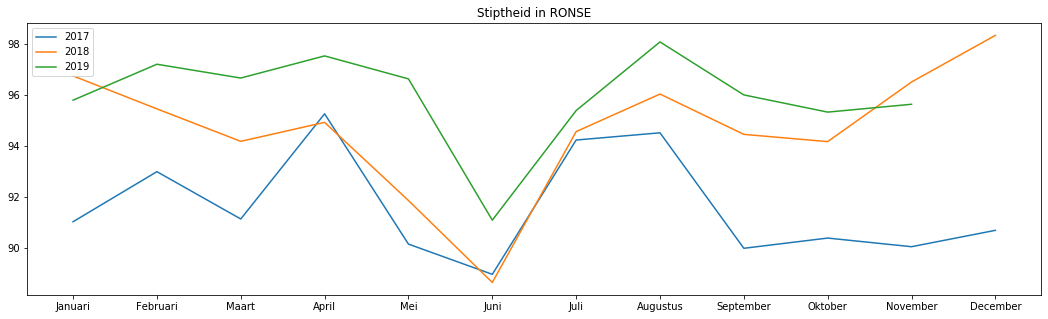

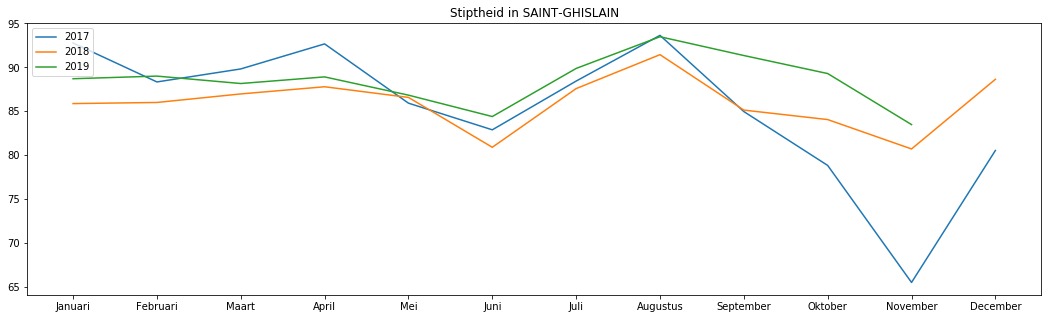

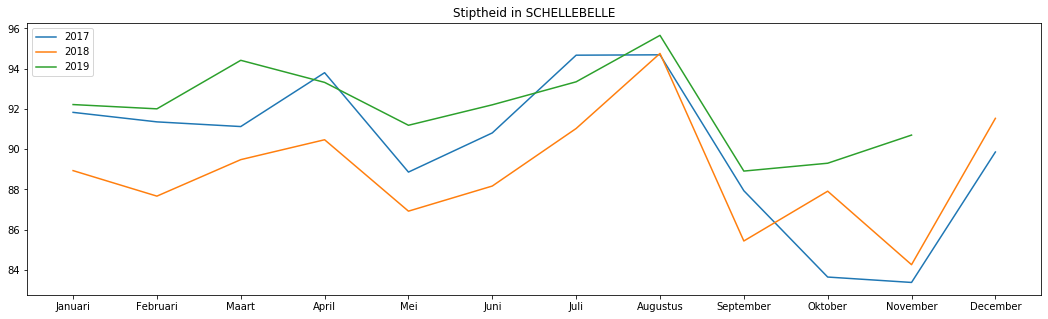

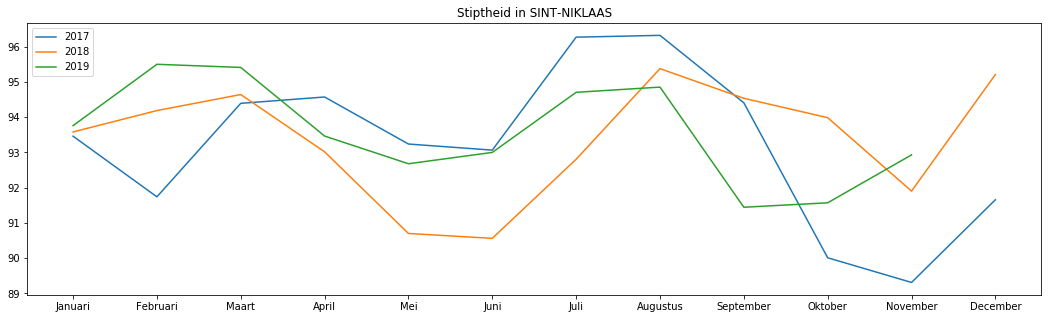

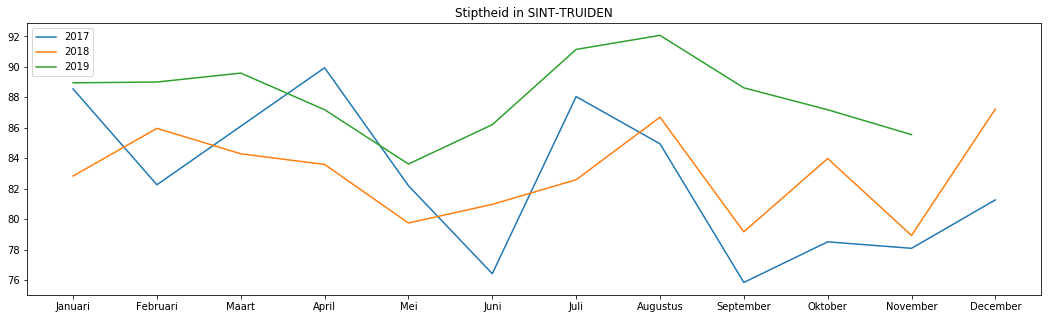

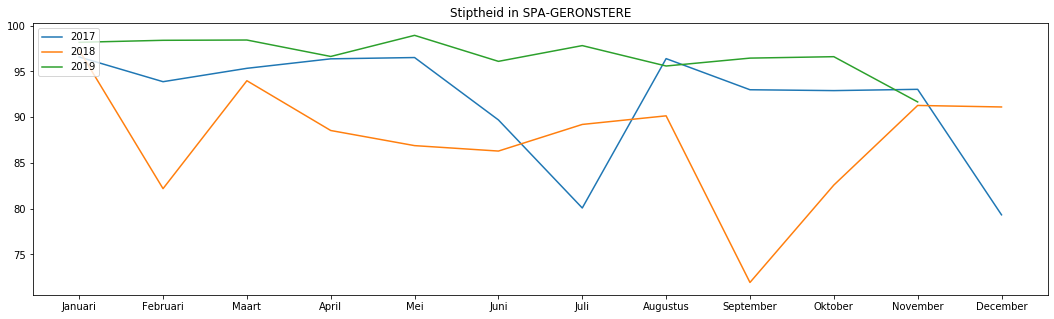

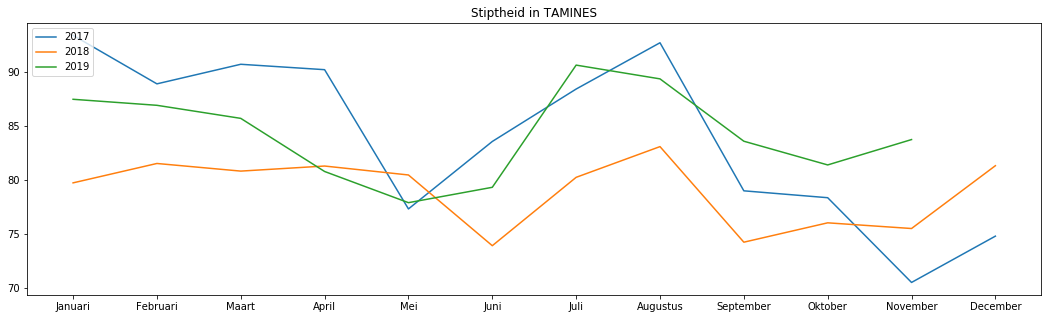

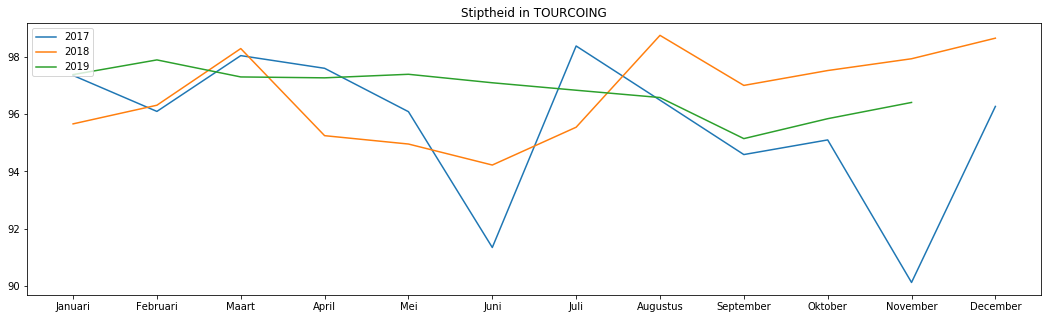

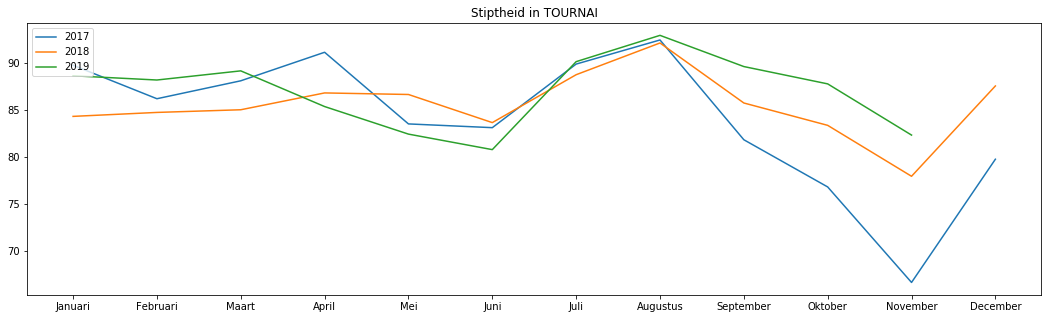

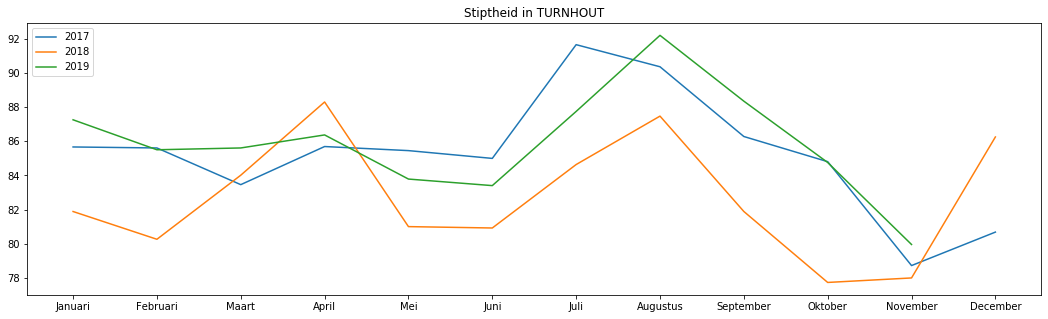

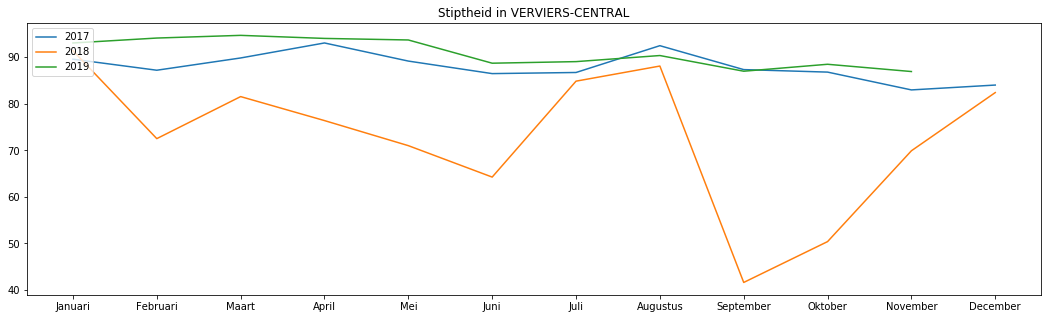

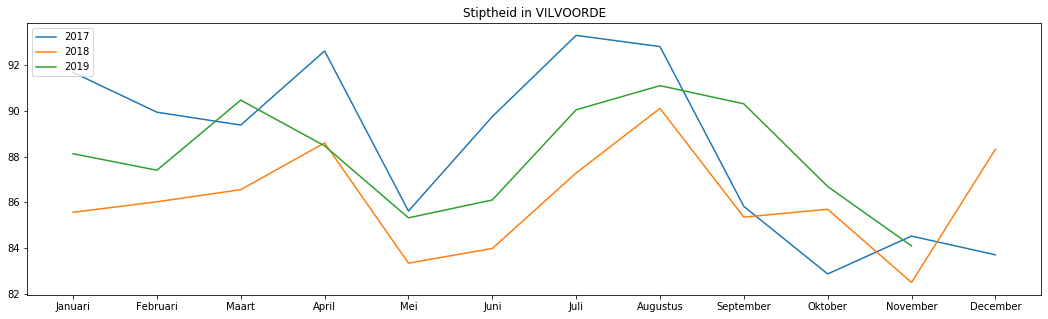

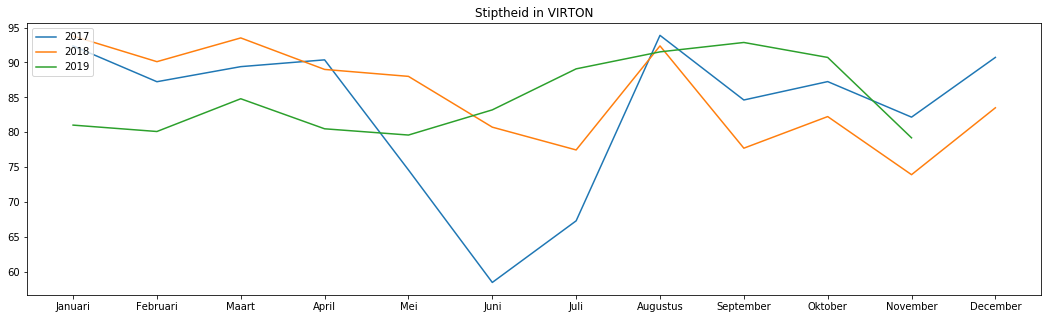

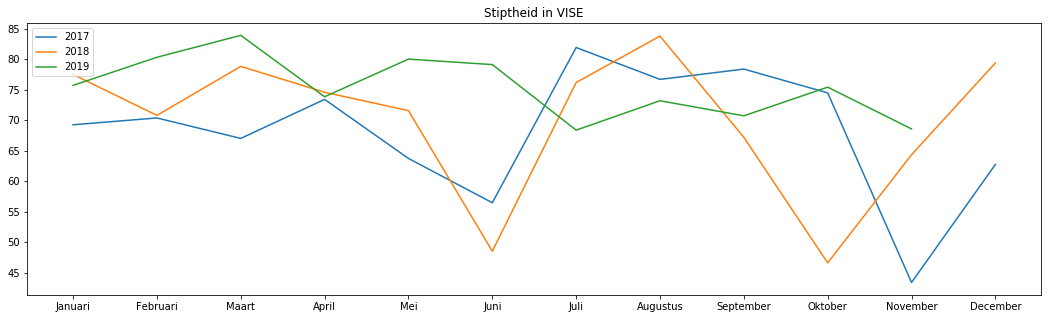

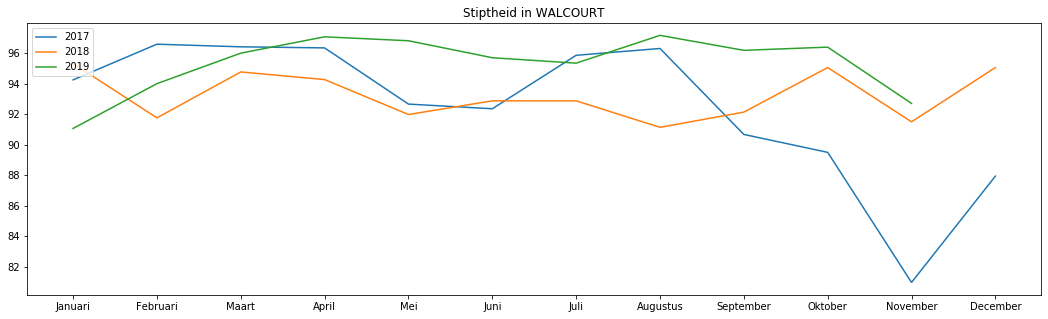

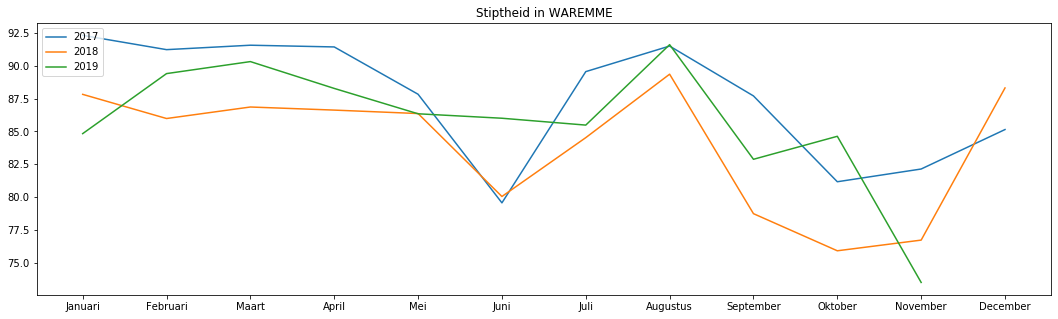

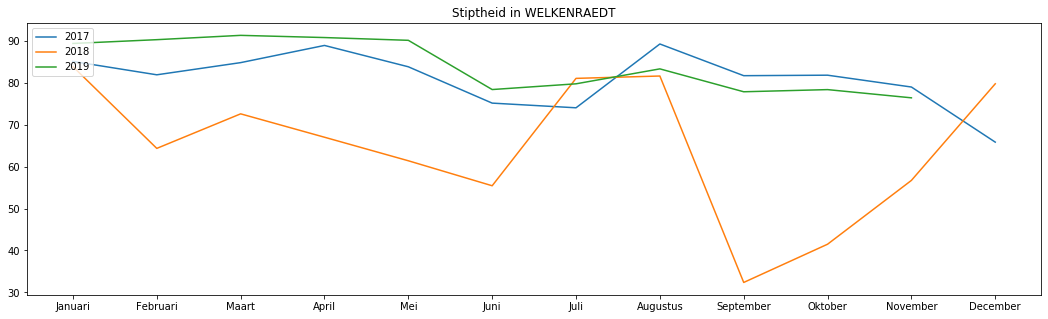

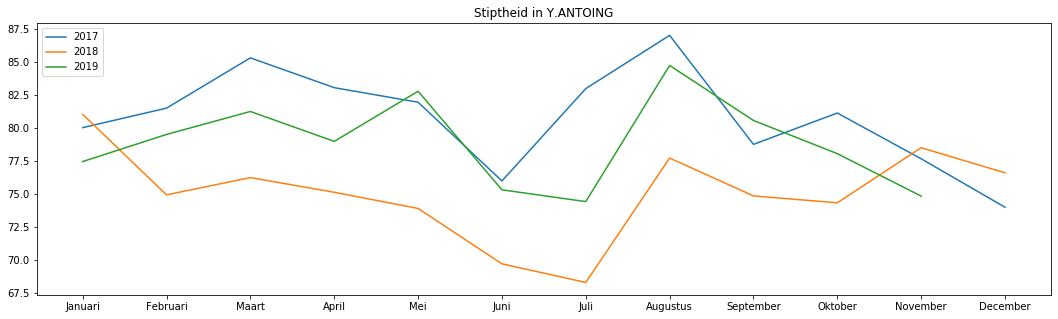

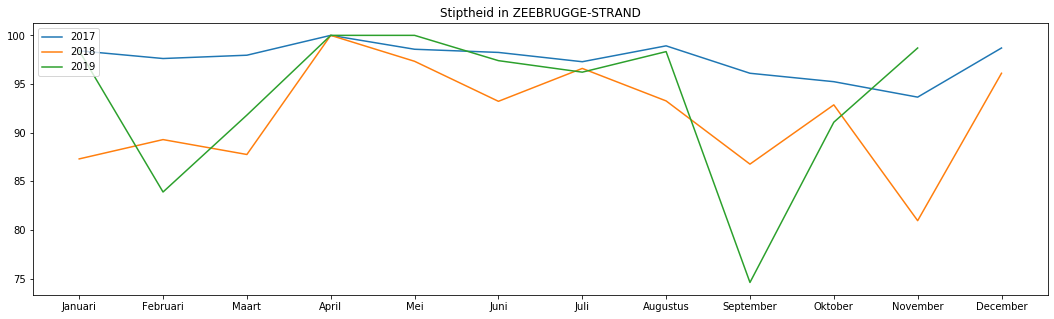

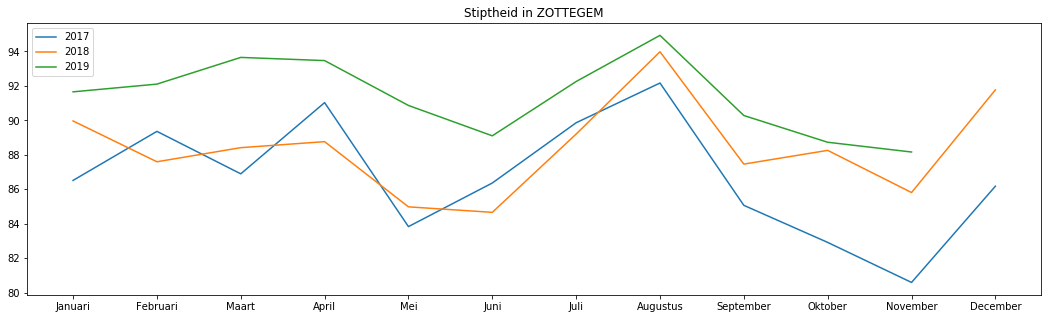

In [6]:
stiptheid = json.load(open("Datasets/stiptheid-in-grote-stations-per-maand.json"))
len_stiptheid = len(stiptheid)
data = []
for i in (range(len_stiptheid)):
    data.append(stiptheid[i]['fields']['station'])
    
stations = list(dict.fromkeys(data))
stations.sort()
for station in stations:
    if(station=='MONCEAU-FORMATION' or station=='ZEEBRUGGE-DORP'):
        continue
    
    output_dict = [(x['fields']['reg'],x['fields']['maand']) for x in stiptheid if x['fields']['station'] == station]
    sort_dict = sorted(output_dict, key=itemgetter(1))
    maanden = ['Januari','Februari','Maart','April','Mei','Juni','Juli','Augustus','September','Oktober','November','December']
    values = []
    values2 = []
    values3 = []
    for x in range(12):
        values.append(sort_dict[x][0])
    for x in range(12,24):
        values2.append(sort_dict[x][0])
    for x in range(24,len(sort_dict)):
        values3.append(sort_dict[x][0])
    fig = plt.figure(figsize=(40, 5))
    plt1 = fig.add_subplot(121)
    plt1.plot(maanden, values)
    plt1.plot(values2)
    plt1.plot(values3)
    plt1.set_title('Stiptheid in ' + station)
    plt1.legend(['2017', '2018', '2019'], loc='upper left')
    plt.show()




# Mobipulse Ochtendspits


Kies een datum:


DatePicker(value=None)

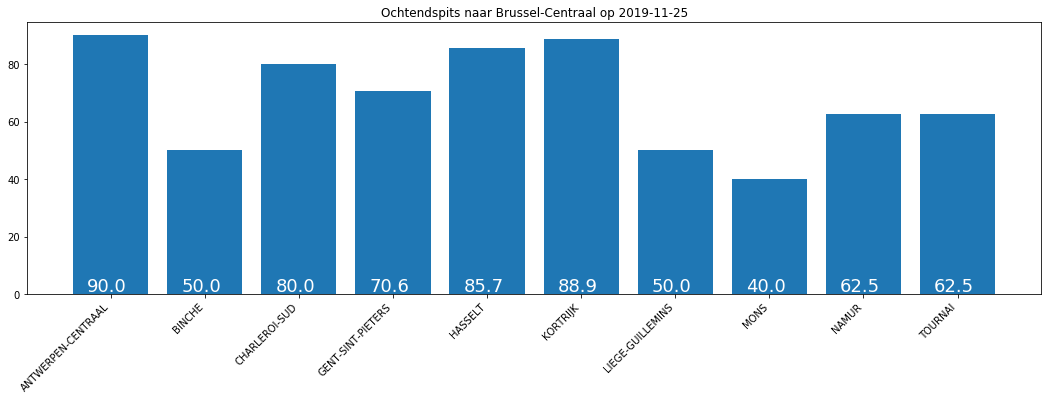

In [13]:
data = json.load(open("Datasets/gegevens-mobipulse.json"))

print('Kies een datum:')
date = widgets.DatePicker()

def showDate(args):
    ochtend = []
    percentages = []
    sort_ochtend = {}
    date.value = args['new']
    string_date = date.value.strftime("%Y-%m-%d")
    if date.value == None:
        print("No value")
    else:
        for i in range(len(data)):
            if data[i]['fields']['dat_dep'] == string_date and data[i]['fields']['naar'] == "BRUSSEL-CENTRAAL":
                sort_ochtend.update({data[i]['fields']['van'] : data[i]['fields']['percentage']})
        for key in sorted(sort_ochtend):
            ochtend.append(key)
            percentages.append(sort_ochtend[key])      
            
        fig = plt.figure(figsize=(40, 5))
        plt1 = fig.add_subplot(121)
        plt1.set_title('Ochtendspits naar Brussel-Centraal op ' + string_date)

        y_pos = np.arange(len(ochtend))
        plt1.bar(y_pos, percentages)
        plt1.set_xticks(np.arange(len(ochtend)))
        plt1.set_xticklabels(ochtend, rotation= 45, ha="right")

        for i, v in enumerate(percentages):
            plt1.text(i-.25, 
                      v/percentages[i]+0, 
                      percentages[i], 
                      fontsize=18,
                        color= "white")
        plt.show()
            

display(date)
date.observe(showDate, 'value')



# Mobipulse Avondspits

Kies een datum:


DatePicker(value=None)

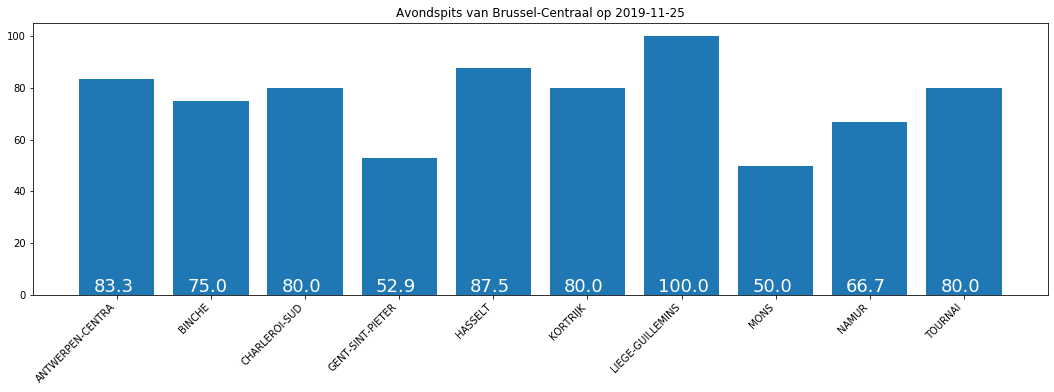

In [14]:
data = json.load(open("Datasets/gegevens-mobipulse.json"))

print('Kies een datum:')
date = widgets.DatePicker()

def showDate(args):
    avond = []
    percentages = []
    sort = {}
    date.value = args['new']
    string_date = date.value.strftime("%Y-%m-%d")
    if date.value == None:
        print("No value")
    else:
        for i in range(len(data)):
            if data[i]['fields']['dat_dep'] == string_date and data[i]['fields']['van'] == "BRUSSEL-CENTRAAL":
                sort.update({data[i]['fields']['naar'] : data[i]['fields']['percentage']})
        for key in sorted(sort):
            avond.append(key)
            percentages.append(sort[key])        
            
        fig = plt.figure(figsize=(40, 5))
        plt1 = fig.add_subplot(121)
        plt1.set_title('Avondspits van Brussel-Centraal op ' + string_date)

        y_pos = np.arange(len(avond))
        plt1.bar(y_pos, percentages)
        plt1.set_xticks(np.arange(len(avond)))
        plt1.set_xticklabels(avond, rotation= 45, ha="right")

        for i, v in enumerate(percentages):
            plt1.text(i-.25, 
                      v/percentages[i]+0, 
                      percentages[i], 
                      fontsize=18,
                        color= "white")
            
plt.show()
display(date)
date.observe(showDate, 'value')


# Afgeschafte Treinen

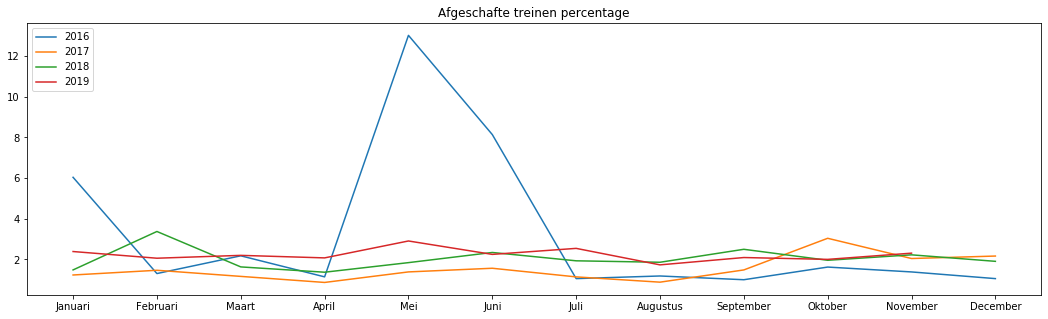

In [15]:
afgeschaft = json.load(open("Datasets/afgeschafte-treinen-per-maand.json"))
treinen = {}
sort_treinen = []

for i in (range(len(afgeschaft))):
    treinen.update({afgeschaft[i]['fields']['maand'] : afgeschaft[i]['fields']['sup0']})
    
for key in sorted(treinen):
    sort_treinen.append(treinen[key])
    
maanden = ['Januari','Februari','Maart','April','Mei','Juni','Juli','Augustus','September','Oktober','November','December']
values = []
values2 = []
values3 = []
values4 = []
for x in range(12):
    values.append(sort_treinen[x])
for x in range(12,24):
    values2.append(sort_treinen[x])
for x in range(24,36):
    values3.append(sort_treinen[x])
for x in range(36,len(sort_treinen)):
    values4.append(sort_treinen[x])
fig = plt.figure(figsize=(40, 5))
plt1 = fig.add_subplot(121)
plt1.plot(maanden, values)
plt1.plot(values2)
plt1.plot(values3)
plt1.plot(values4)
plt1.set_title('Afgeschafte treinen percentage')
plt1.legend(['2016','2017', '2018', '2019'], loc='upper left')
plt.show()



# Verbruik per KM

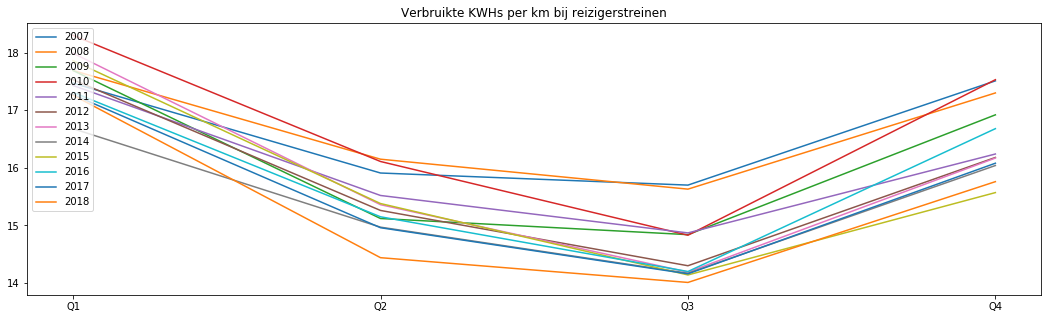

In [16]:
energie = json.load(open("Datasets/Correlatie/total-tractie-permaand.json"))
km = json.load(open("Datasets/Correlatie/evolutie-van-treinkilometers.json"))
# begin Energie

maand_verbruik = []
kwartalen = []
verbruik = []

kwartalen_un = []
verbruik_tot = []

for i in range(len(energie)):
    maand_verbruik.append(str(energie[i]['fields']['empty']) + " | " + str(energie[i]['fields']['totaal']))
        
maand_verbruik.sort()

for i in range(len(maand_verbruik)): 
    maand = (maand_verbruik[i]).partition(' | ')[0].partition('-')[2]
    jaar = (maand_verbruik[i]).partition(' | ')[0].partition('-')[0]
    
    if int(jaar) > 2006:
        verbruik.append(maand_verbruik[i].partition(' | ')[2])

        if (maand == "01") or (maand == "02") or (maand == "03"):
            kwartalen.append(jaar + " - Q1")      
        elif (maand == "04") or (maand == "05") or (maand == "06"):
            kwartalen.append(jaar + " - Q2")
        elif (maand == "07") or (maand == "08") or (maand == "09"):
            kwartalen.append(jaar + " - Q3")      
        else:
            kwartalen.append(jaar + " - Q4")      

kwartalen_un = list(dict.fromkeys(kwartalen))

if "2019 - Q4" in kwartalen_un:
    kwartalen_un.remove("2019 - Q4")

try:
    for i in range((len(verbruik)//3) + 1):
        totaal = 0
        totaal += int(verbruik[i * 3])
        totaal += int(verbruik[(i * 3) + 1])
        totaal += int(verbruik[(i * 3) + 2])
        verbruik_tot.append(totaal)
        
except IndexError:
    pass

#begin KM
trimester_km = []
trimesters = []
trein_kms = []

for i in range(len(km)):
    if km[i]['fields']['effectief_niet_effectief_nl'] == "Effectief":
            if km[i]['fields']['sector_nl'] == "Reizigers":
                trimester_km.append(km[i]['fields']['trimester'] + " | " + str(km[i]['fields']['trein_km']))

trimester_km.sort()

for i in range(len(trimester_km)):
    trimesters.append(trimester_km[i].partition(" | ")[0])
    trein_kms.append(trimester_km[i].partition(" | ")[2])
    
#begin Correlatie
verbruik_per_km = []

#Berekent verbruik (in kWh) per KM
for i in range(len(kwartalen_un)):
    totaal = (verbruik_tot[i] * 1000) / float(trein_kms[i])
    totaal_afg = round(totaal,2)
    verbruik_per_km.append(totaal_afg)
    
qs = ['Q1','Q2','Q3','Q4']
values = []
values2 = []
values3 = []
values4 = []
fig = plt.figure(figsize=(40, 5))
plt1 = fig.add_subplot(121)
try:
    for x in range(0, len(verbruik_per_km), 4):
        values=[]
        for i in range(x,x+4):
            values.append(verbruik_per_km[i])
        plt1.plot(qs, values)
except IndexError:
    pass
    

plt1.set_title('Verbruikte KWHs per km bij reizigerstreinen')
plt1.legend(['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017', '2018', '2019'], loc='upper left')
plt.show()
